# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다.
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고,
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [60]:
# colab 그래프 한글화 코드
# jupyter 사용시 코드 주석처리 할 것.
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib as mpl
import warnings

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# warnings.simplefilter(action='ignore', category=UserWarning)

# plt.rc('font', family='NanumBarunGothic')
# mpl.rcParams['axes.unicode_minus'] = False

# # colab - drive 연동
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
path = '/content/drive/MyDrive/kt_aivle/8_mini_proj_2/day_2_실습/'

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [6]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.


### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1.pkl

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data = pd.read_pickle('data1_1.pkl')

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data.head()

,Date,count_taxi,receipt,boarding,avg_rate,avg_ride_distance,target,temp_max,temp_min,rain(mm),...,season,year,weekend,covid_19,holiday,day7_avg_wait_time,ride_ratio,temp_avg,humidity_avg,weekend_holiday
0,2015-01-01,213,1023,924,2427,10764,17.2,-2.0,-8.9,0.0,...,Winter,2015,0,0,1.0,17.200000,0.90,-5.4,45.5,1.0
1,2015-01-02,420,3158,2839,2216,8611,26.2,2.4,-9.2,0.0,...,Winter,2015,0,0,0.0,21.700000,0.90,-3.4,55.0,0.0
2,2015-01-03,209,1648,1514,2377,10198,24.5,8.2,0.2,0.0,...,Winter,2015,1,0,0.0,22.633333,0.92,4.2,73.5,1.0
3,2015-01-04,196,1646,1526,2431,10955,26.2,7.9,-0.9,0.0,...,Winter,2015,1,0,0.0,23.525000,0.93,3.5,73.5,1.0
4,2015-01-05,421,4250,3730,2214,8663,23.6,4.1,-7.4,3.4,...,Winter,2015,0,0,0.0,23.540000,0.88,-1.7,63.5,0.0


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data.tail()

,Date,count_taxi,receipt,boarding,avg_rate,avg_ride_distance,target,temp_max,temp_min,rain(mm),...,season,year,weekend,covid_19,holiday,day7_avg_wait_time,ride_ratio,temp_avg,humidity_avg,weekend_holiday
2917,2022-12-26,603,5555,4605,2163,7889,44.4,3.0,-7.3,0.0,...,Winter,2022,0,0,0.0,42.771429,0.83,-2.2,68.5,0.0
2918,2022-12-27,669,5635,4654,2198,8178,44.8,-0.3,-5.4,0.1,...,Winter,2022,0,0,0.0,43.514286,0.83,-2.8,66.0,0.0
2919,2022-12-28,607,5654,4648,2161,7882,52.5,1.7,-7.8,0.0,...,Winter,2022,0,0,0.0,42.957143,0.82,-3.0,52.5,0.0
2920,2022-12-29,581,5250,4247,2229,8433,38.3,2.1,-4.0,0.0,...,Winter,2022,0,0,0.0,41.042857,0.81,-1.0,62.5,0.0
2921,2022-12-30,600,5293,4200,2183,8155,33.7,-4.4,-4.4,0.0,...,Winter,2022,0,0,0.0,41.657143,0.79,-4.4,66.0,0.0


In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data.isna().sum()

Date                  0
count_taxi            0
receipt               0
boarding              0
avg_rate              0
avg_ride_distance     0
target                0
temp_max              0
temp_min              0
rain(mm)              0
humidity_max(%)       0
humidity_min(%)       0
sunshine(MJ/m2)       0
weekday               0
month                 0
season                0
year                  0
weekend               0
covid_19              0
holiday               0
day7_avg_wait_time    0
ride_ratio            0
temp_avg              0
humidity_avg          0
weekend_holiday       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2922 entries, 0 to 2921
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2922 non-null   datetime64[ns]
 1   count_taxi          2922 non-null   int64         
 2   receipt             2922 non-null   int64         
 3   boarding            2922 non-null   int64         
 4   avg_rate            2922 non-null   int64         
 5   avg_ride_distance   2922 non-null   int64         
 6   target              2922 non-null   float64       
 7   temp_max            2922 non-null   float64       
 8   temp_min            2922 non-null   float64       
 9   rain(mm)            2922 non-null   float64       
 10  humidity_max(%)     2922 non-null   float64       
 11  humidity_min(%)     2922 non-null   float64       
 12  sunshine(MJ/m2)     2922 non-null   float64       
 13  weekday             2922 non-null   category    

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다.
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 :
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [9]:
# 숫자형 변수 분석
def eda_1_n(data, var, hue_var = ''):
    display(data[[var]].describe().T)

    if hue_var == '' :
        plt.figure(figsize = (15,10))
        plt.subplot(2,1,1)
        sns.histplot(data[var], kde = True, bins = 50)
        plt.grid()

        plt.subplot(2,1,2)
        sns.boxplot(x = data[var])
        plt.grid()
        plt.show()
    else :
        plt.figure(figsize = (15,5))
        plt.subplot(1,2,1)
        sns.kdeplot(x= var, data = data, hue = hue_var)
        plt.grid()

        plt.subplot(1,2,2)
        sns.boxplot(x = hue_var, y = var, data = data)
        plt.grid()


In [10]:
# 범주형 변수 분석
def eda_1_c(data, var, hue_var = ''):

    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    result = pd.DataFrame({'Count':cnt, 'Prop':prop})
    display(result)

    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

In [11]:
def eda_1_n_weekend_holiday(data, var):
    display(eda_1_n(data, var, hue_var = 'weekend'))
    display(eda_1_n(data, var, hue_var = 'holiday'))
    display(eda_1_n(data, var, hue_var = 'weekend_holiday'))

#### 1) 접수건

,count,mean,std,min,25%,50%,75%,max
receipt,2922.0,3925.439767,1509.964823,527.0,2160.5,4720.5,5110.0,6182.0


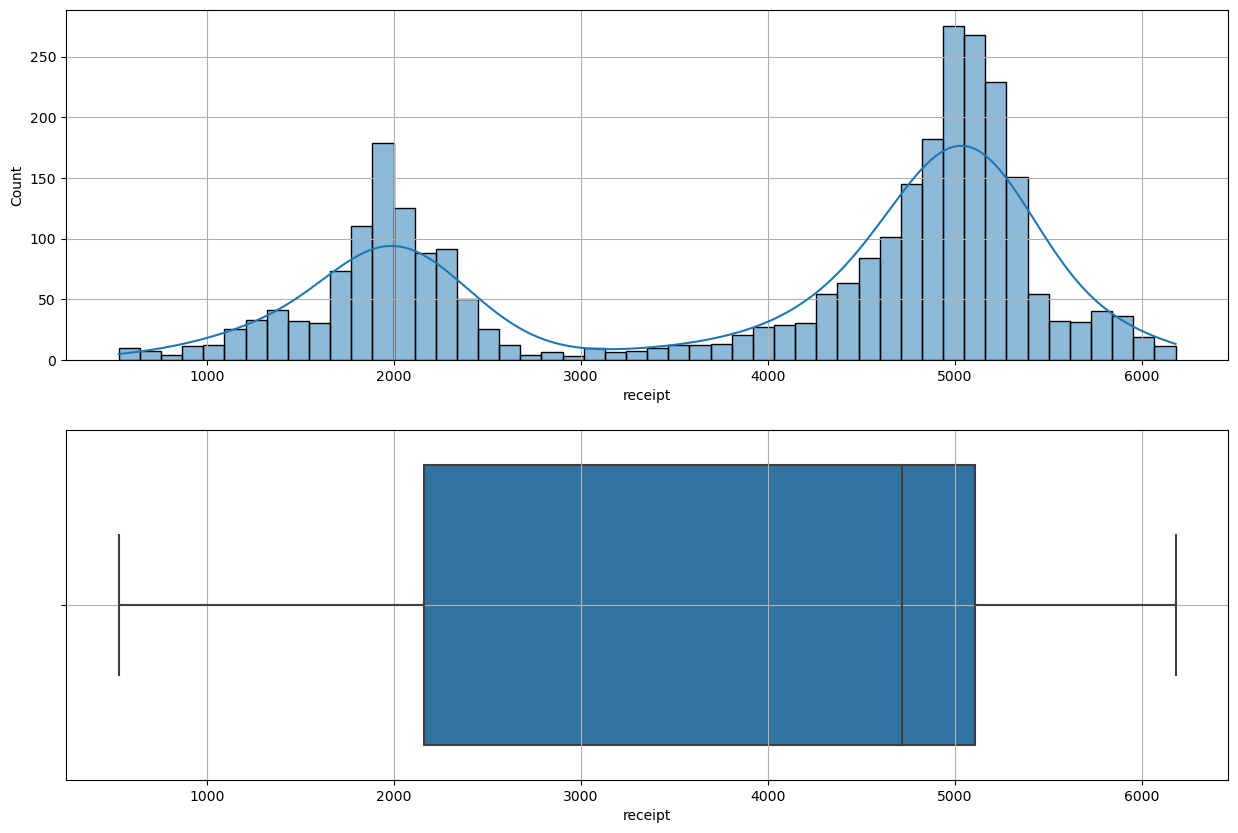

In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

col = 'receipt'

eda_1_n(data, col)

,count,mean,std,min,25%,50%,75%,max
receipt,2922.0,3925.439767,1509.964823,527.0,2160.5,4720.5,5110.0,6182.0


None

,count,mean,std,min,25%,50%,75%,max
receipt,2922.0,3925.439767,1509.964823,527.0,2160.5,4720.5,5110.0,6182.0


None

,count,mean,std,min,25%,50%,75%,max
receipt,2922.0,3925.439767,1509.964823,527.0,2160.5,4720.5,5110.0,6182.0


None

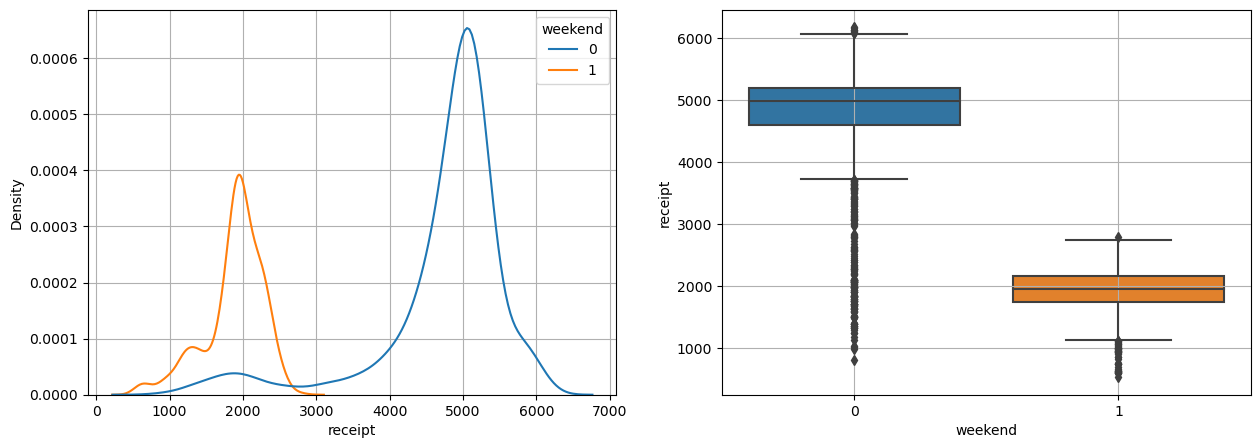

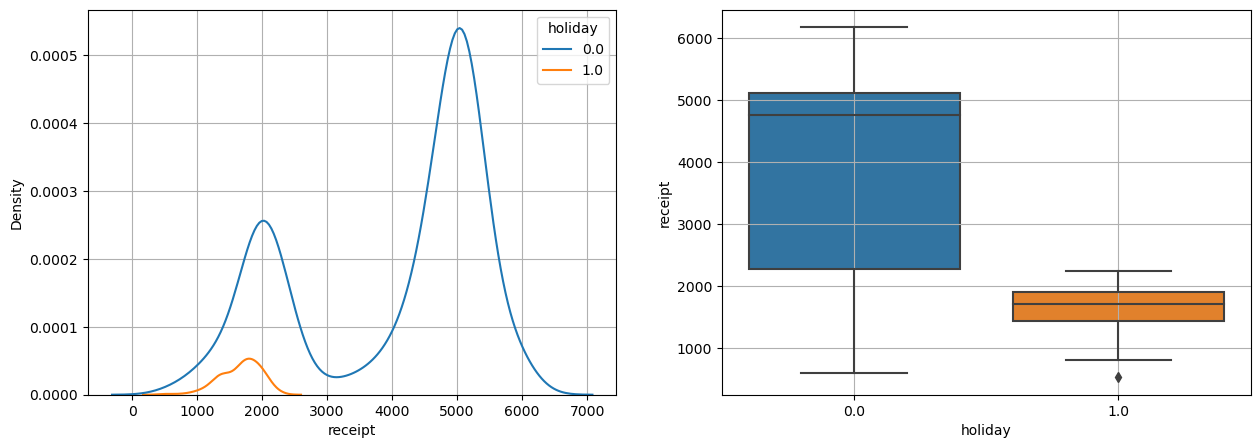

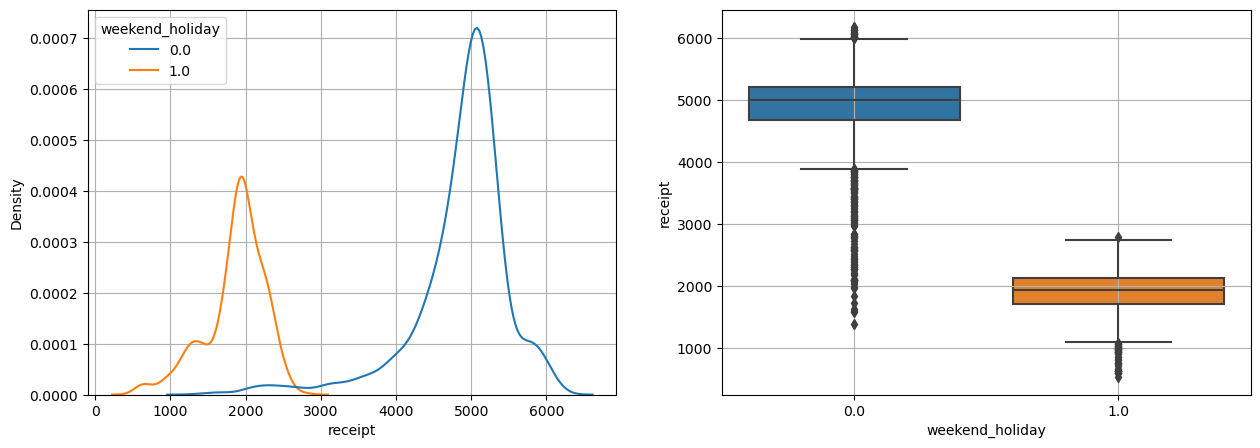

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n_weekend_holiday(data, col)

,count,mean,std,min,25%,50%,75%,max
receipt,2922.0,3925.439767,1509.964823,527.0,2160.5,4720.5,5110.0,6182.0


None

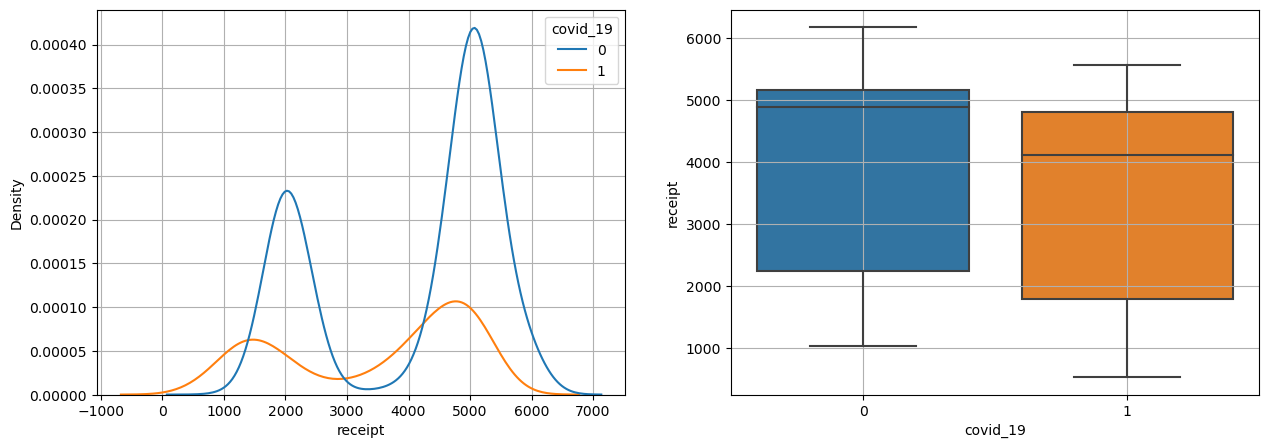

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 주말 일 경우
display(eda_1_n(data, col, hue_var = 'covid_19'))

#### 2) 평균대기시간

,count,mean,std,min,25%,50%,75%,max
target,2922.0,40.30616,14.097992,17.2,29.6,38.2,48.6,96.1


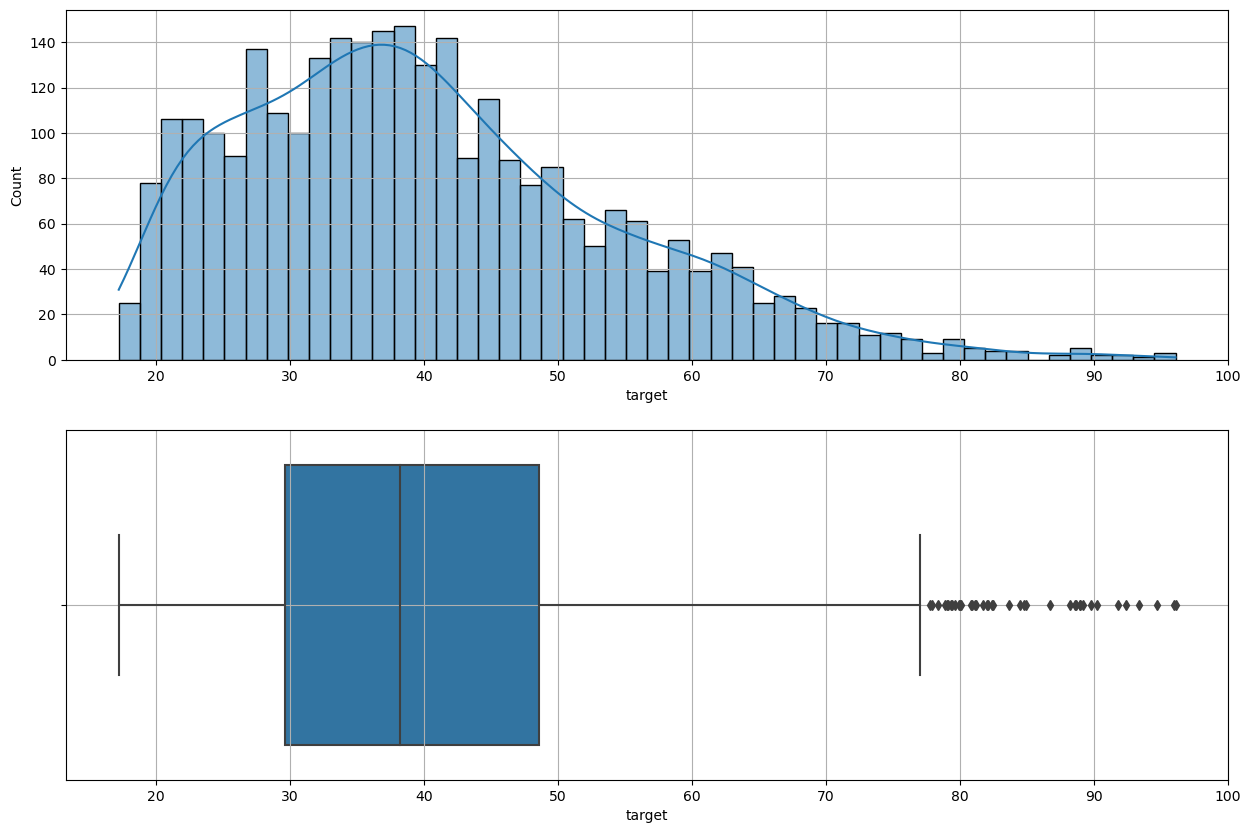

In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

col = 'target'

eda_1_n(data, col)

,count,mean,std,min,25%,50%,75%,max
target,2922.0,40.30616,14.097992,17.2,29.6,38.2,48.6,96.1


None

,count,mean,std,min,25%,50%,75%,max
target,2922.0,40.30616,14.097992,17.2,29.6,38.2,48.6,96.1


None

,count,mean,std,min,25%,50%,75%,max
target,2922.0,40.30616,14.097992,17.2,29.6,38.2,48.6,96.1


None

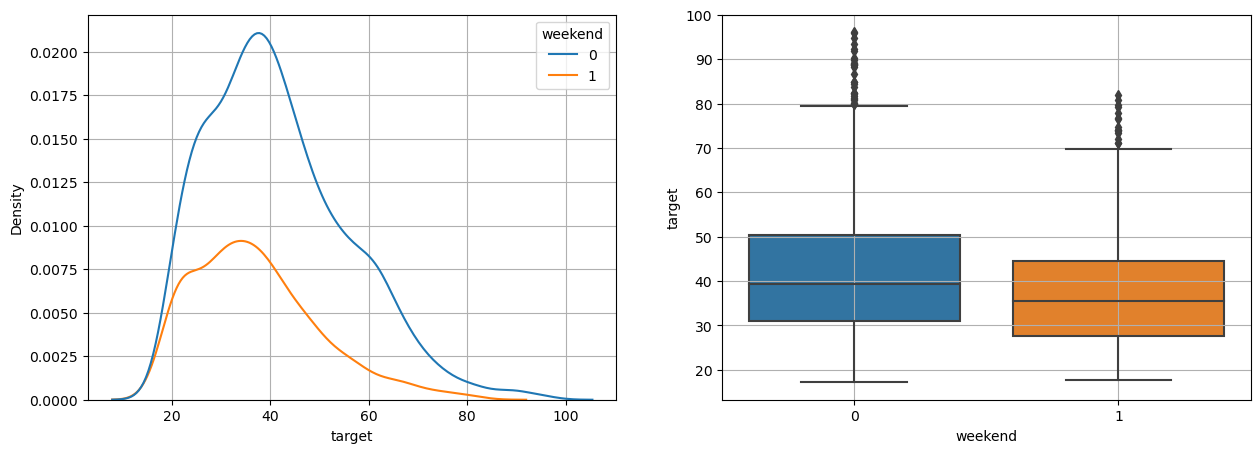

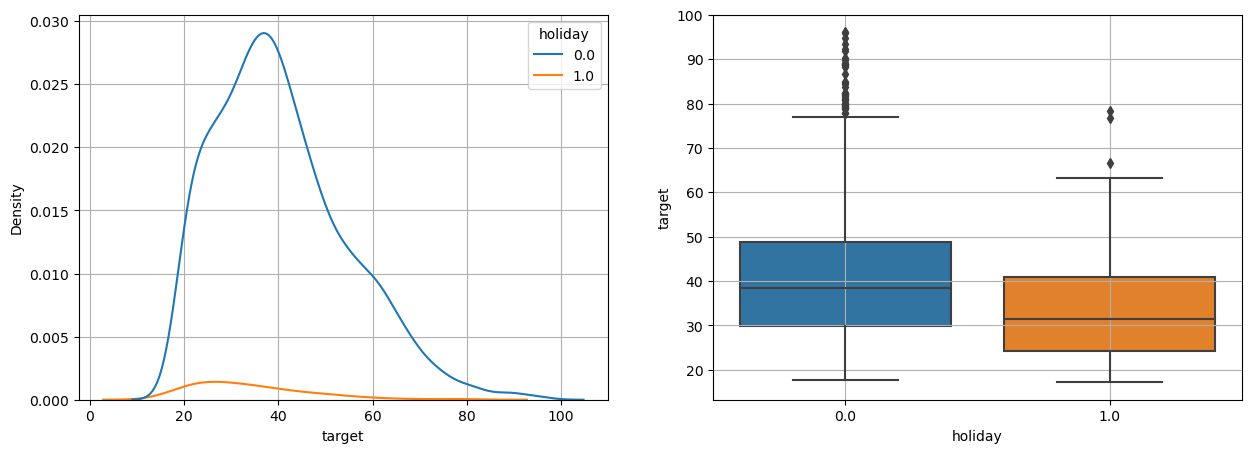

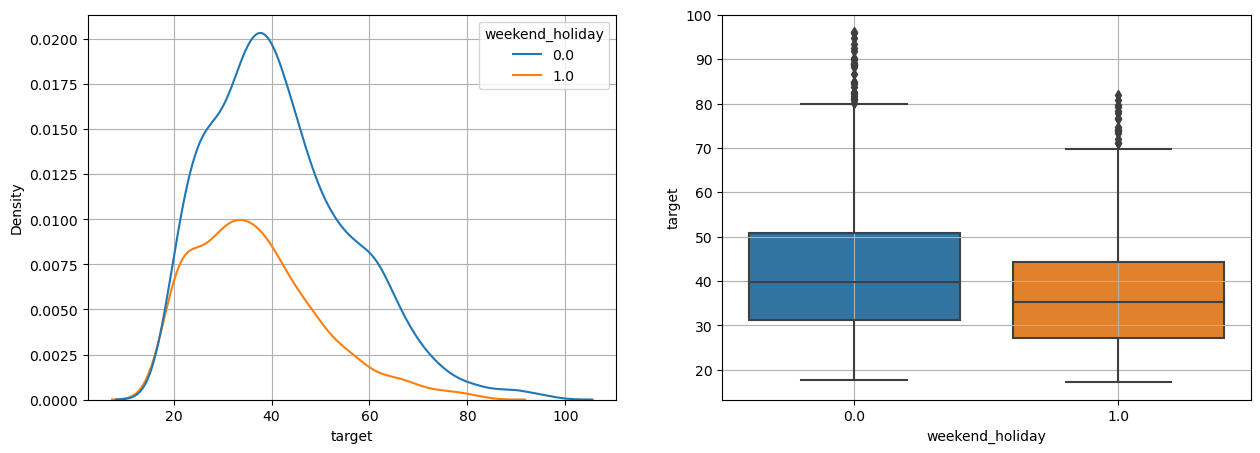

In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

def eda_1_n_weekend_holiday(data, var):
    display(eda_1_n(data, var, hue_var = 'weekend'))
    display(eda_1_n(data, var, hue_var = 'holiday'))
    display(eda_1_n(data, var, hue_var = 'weekend_holiday'))

eda_1_n_weekend_holiday(data, col)

,count,mean,std,min,25%,50%,75%,max
target,2922.0,40.30616,14.097992,17.2,29.6,38.2,48.6,96.1


None

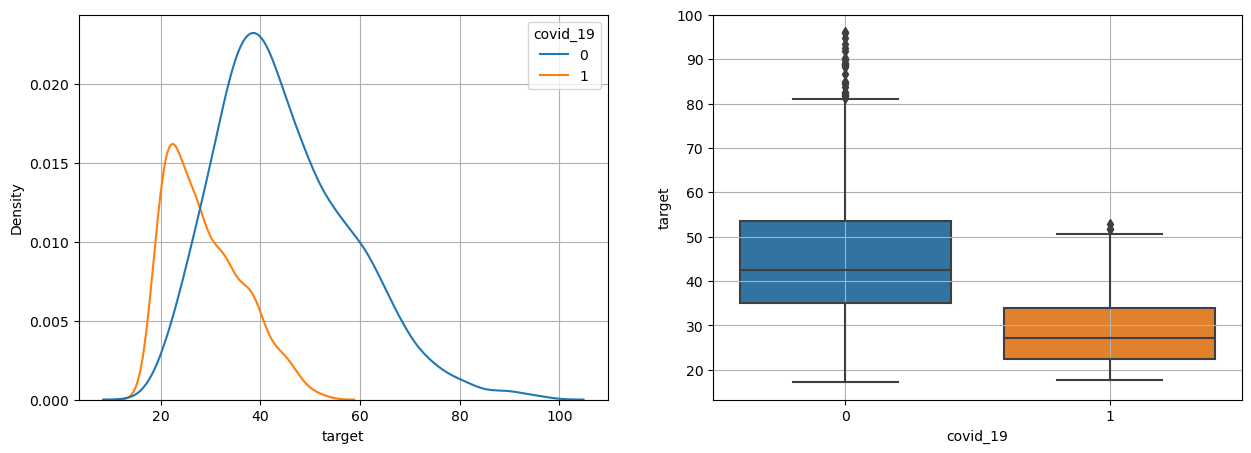

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 주말 일 경우
display(eda_1_n(data, col, hue_var = 'covid_19'))

#### 3) 운임

,count,mean,std,min,25%,50%,75%,max
avg_rate,2922.0,2304.357632,107.369846,2131.0,2228.0,2257.0,2401.0,2733.0


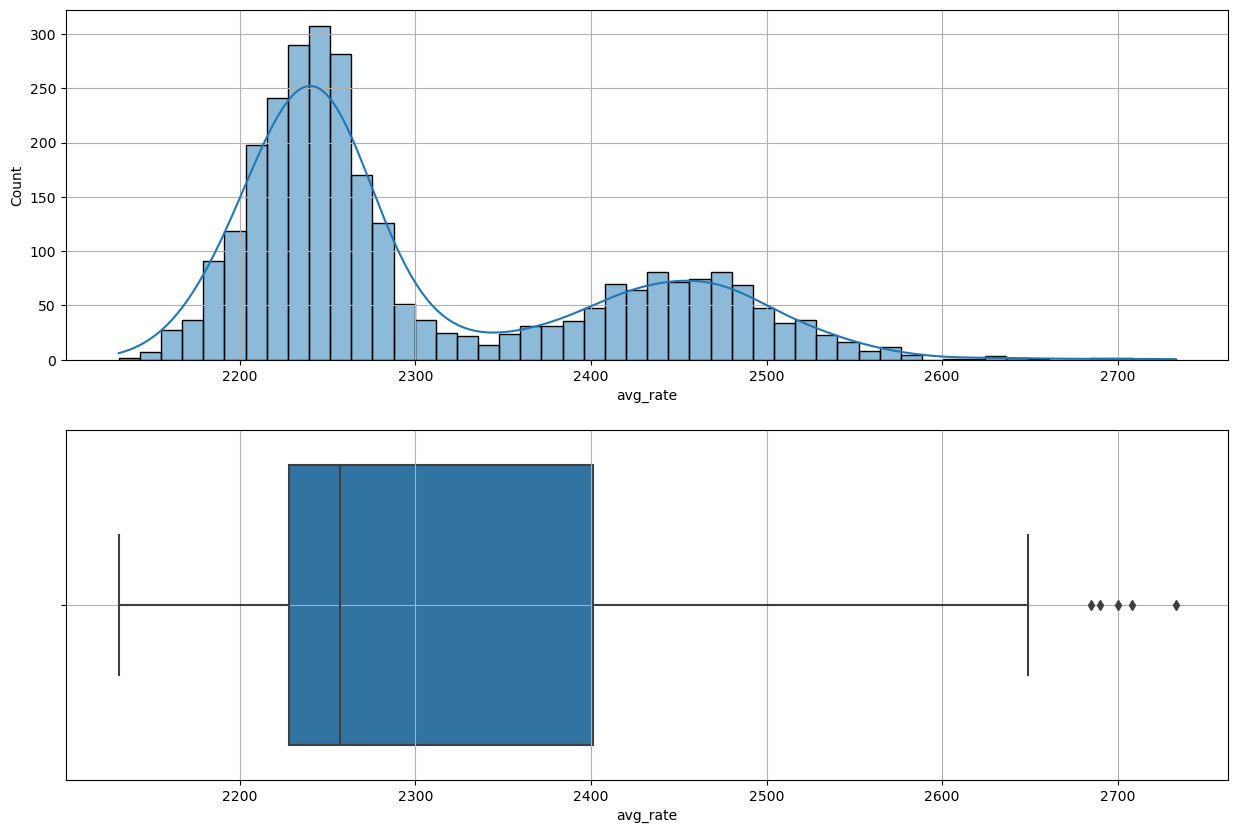

In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

col = 'avg_rate'

eda_1_n(data, col)

,count,mean,std,min,25%,50%,75%,max
avg_rate,2922.0,2304.357632,107.369846,2131.0,2228.0,2257.0,2401.0,2733.0


None

,count,mean,std,min,25%,50%,75%,max
avg_rate,2922.0,2304.357632,107.369846,2131.0,2228.0,2257.0,2401.0,2733.0


None

,count,mean,std,min,25%,50%,75%,max
avg_rate,2922.0,2304.357632,107.369846,2131.0,2228.0,2257.0,2401.0,2733.0


None

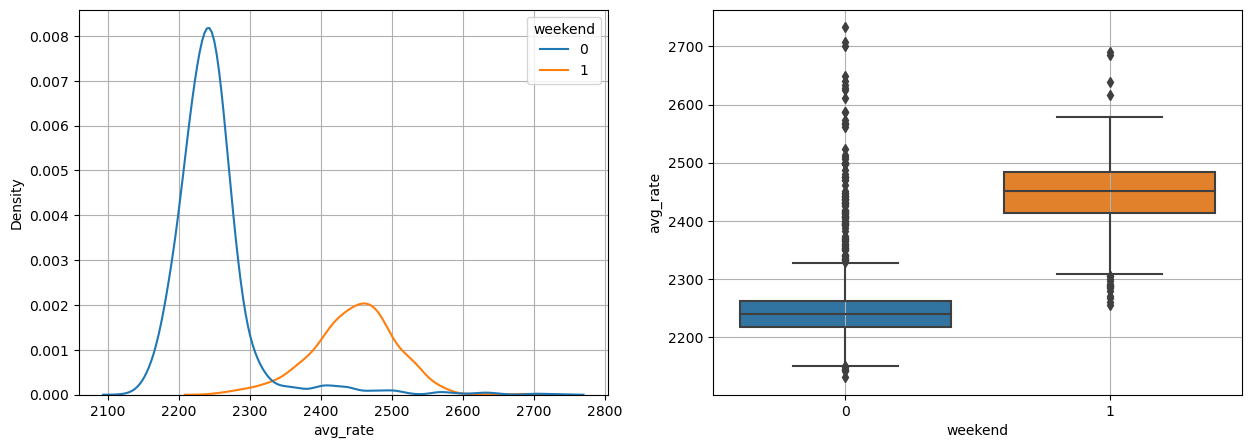

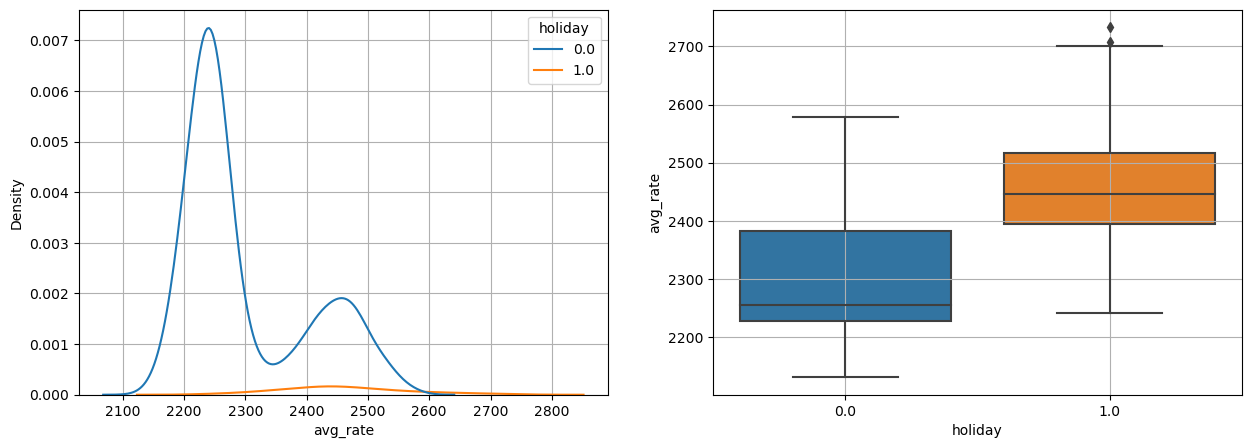

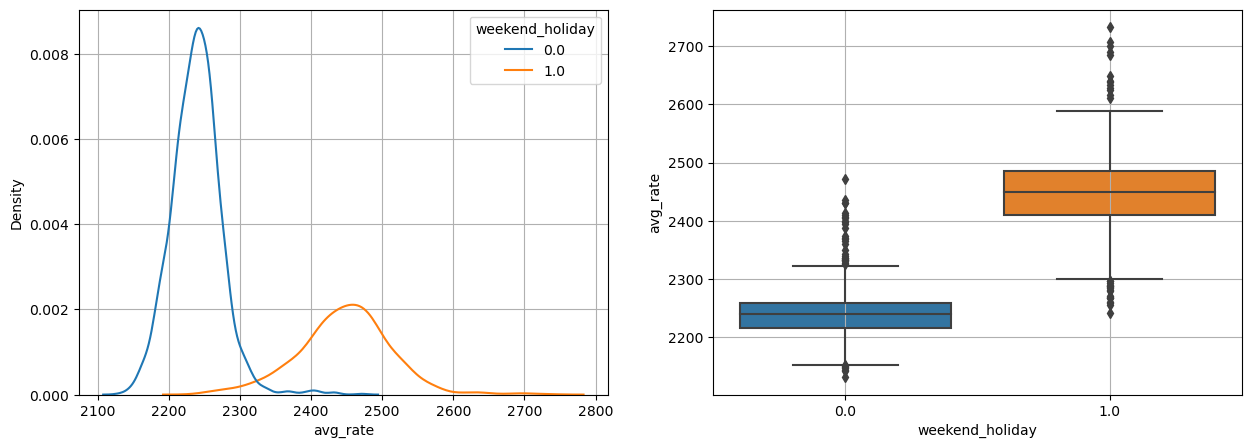

In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n_weekend_holiday(data, col)

,count,mean,std,min,25%,50%,75%,max
avg_rate,2922.0,2304.357632,107.369846,2131.0,2228.0,2257.0,2401.0,2733.0


None

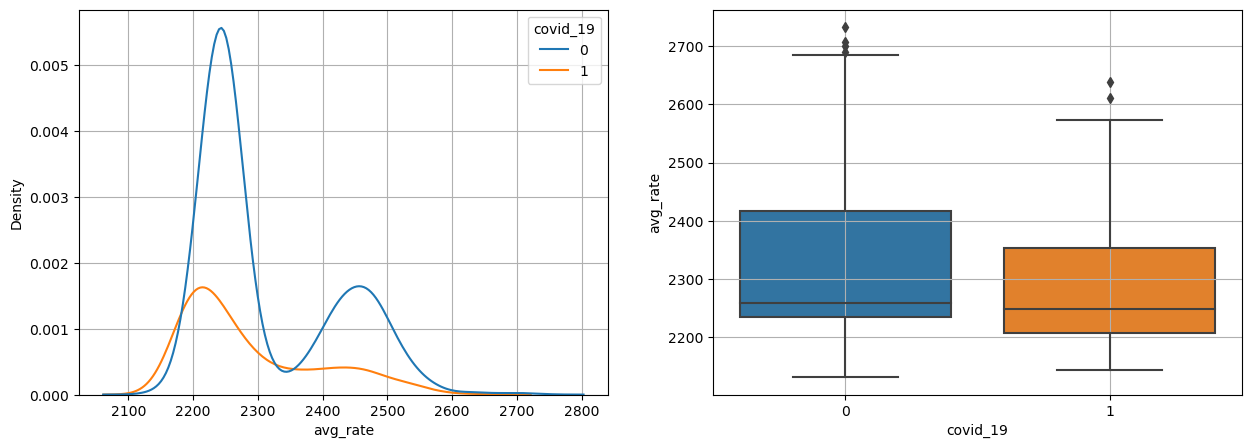

In [20]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 주말 일 경우
display(eda_1_n(data, col, hue_var = 'covid_19'))

#### 4) 평균거리

,count,mean,std,min,25%,50%,75%,max
avg_ride_distance,2922.0,9254.291239,1020.236019,7672.0,8521.0,8821.5,10154.0,14136.0


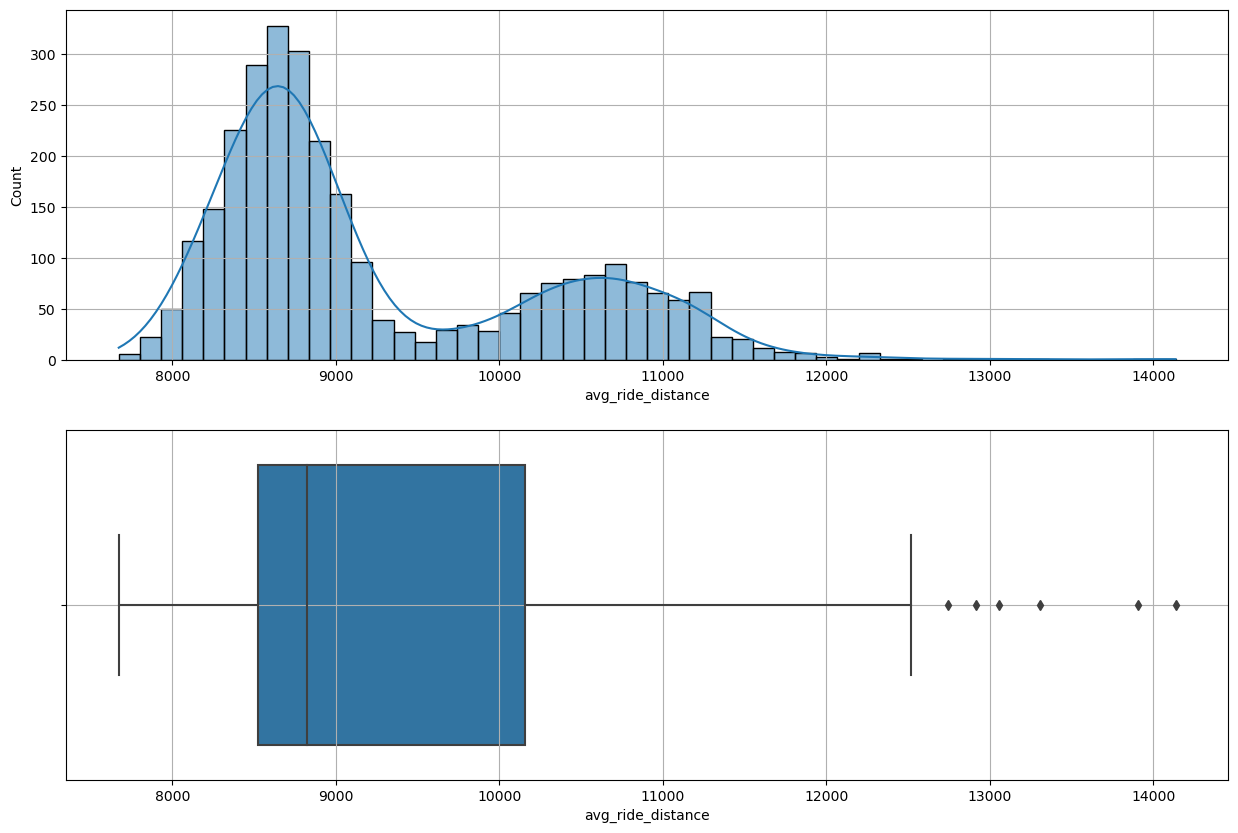

In [21]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

col = 'avg_ride_distance'

eda_1_n(data, col)

,count,mean,std,min,25%,50%,75%,max
avg_ride_distance,2922.0,9254.291239,1020.236019,7672.0,8521.0,8821.5,10154.0,14136.0


None

,count,mean,std,min,25%,50%,75%,max
avg_ride_distance,2922.0,9254.291239,1020.236019,7672.0,8521.0,8821.5,10154.0,14136.0


None

,count,mean,std,min,25%,50%,75%,max
avg_ride_distance,2922.0,9254.291239,1020.236019,7672.0,8521.0,8821.5,10154.0,14136.0


None

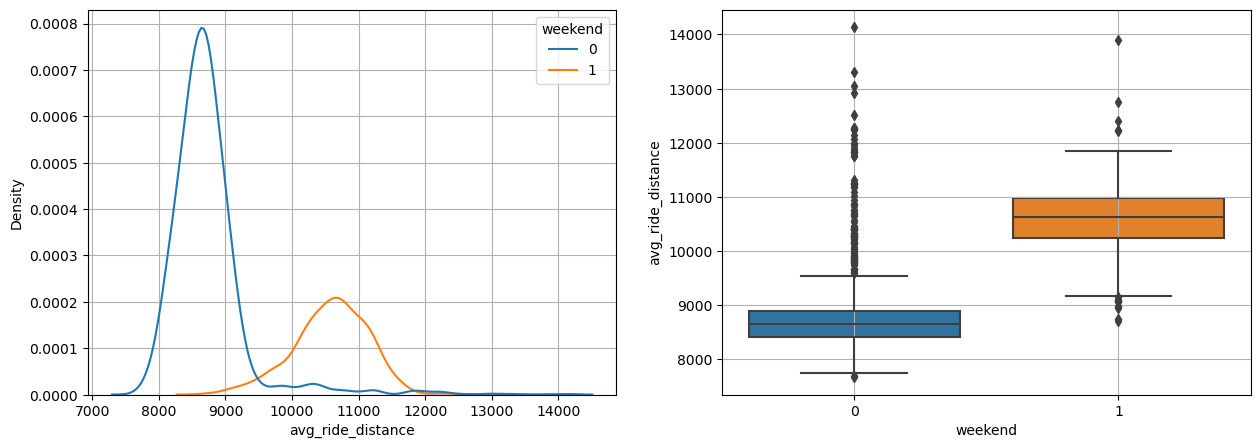

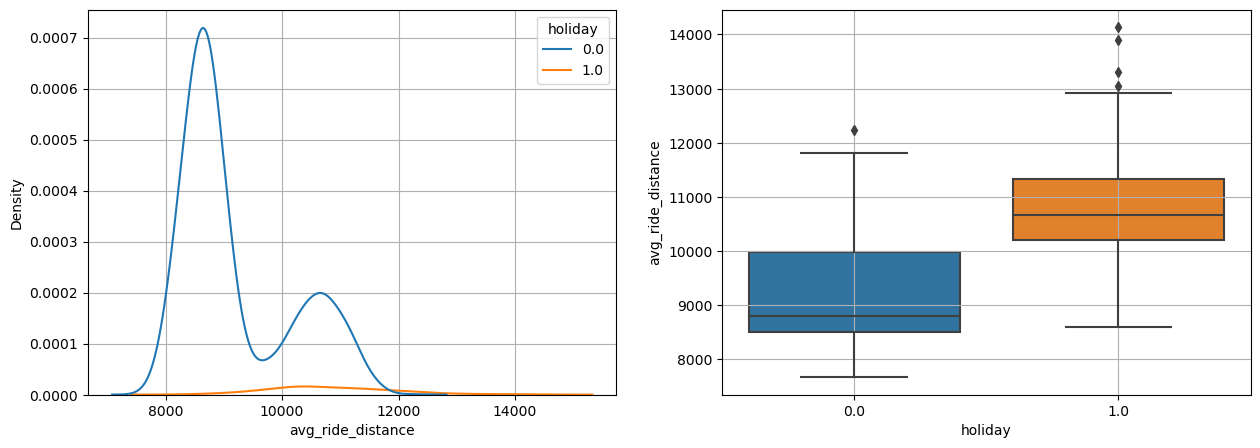

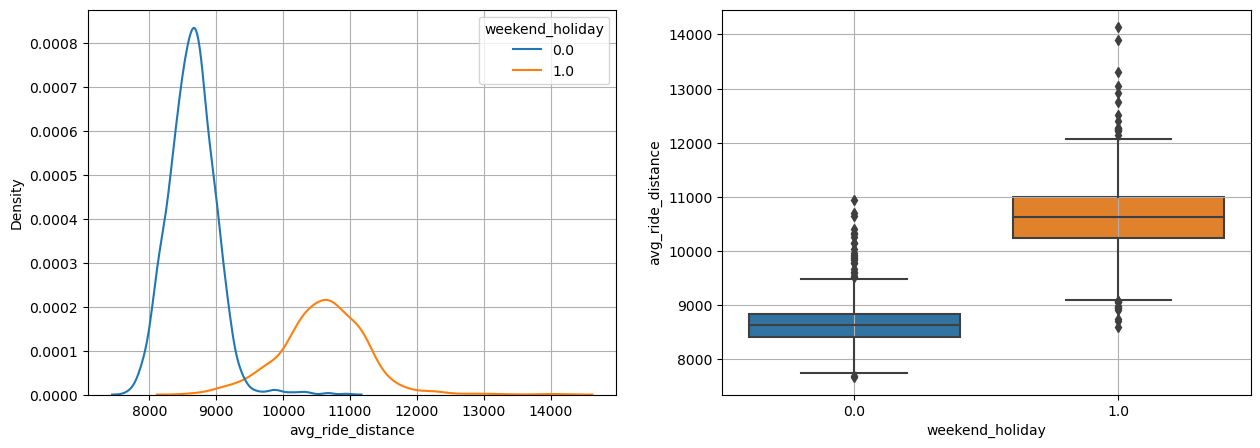

In [22]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n_weekend_holiday(data, col)

,count,mean,std,min,25%,50%,75%,max
avg_ride_distance,2922.0,9254.291239,1020.236019,7672.0,8521.0,8821.5,10154.0,14136.0


None

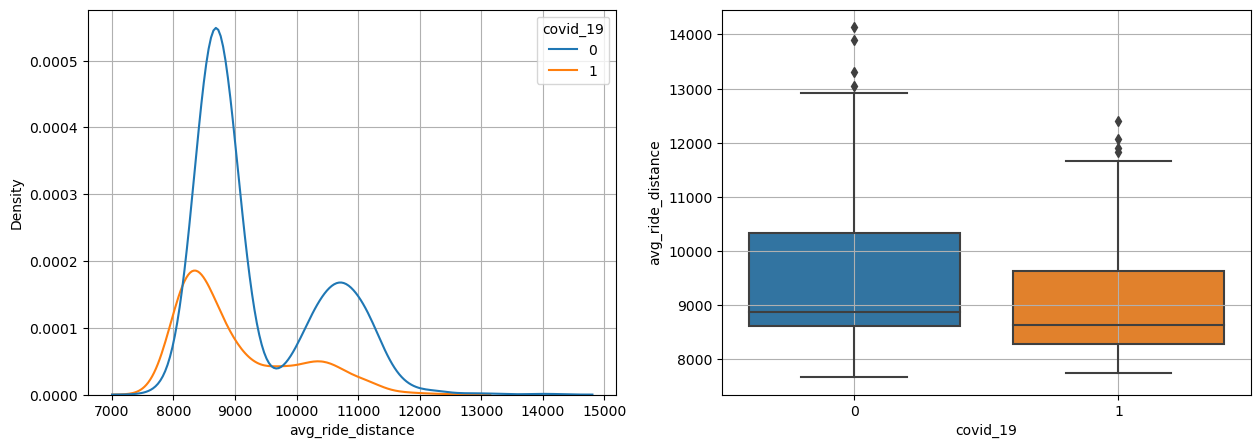

In [23]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 주말 일 경우
display(eda_1_n(data, col, hue_var = 'covid_19'))

#### 5) 탑승률

,count,mean,std,min,25%,50%,75%,max
ride_ratio,2922.0,0.84154,0.052311,0.6,0.81,0.85,0.88,0.97


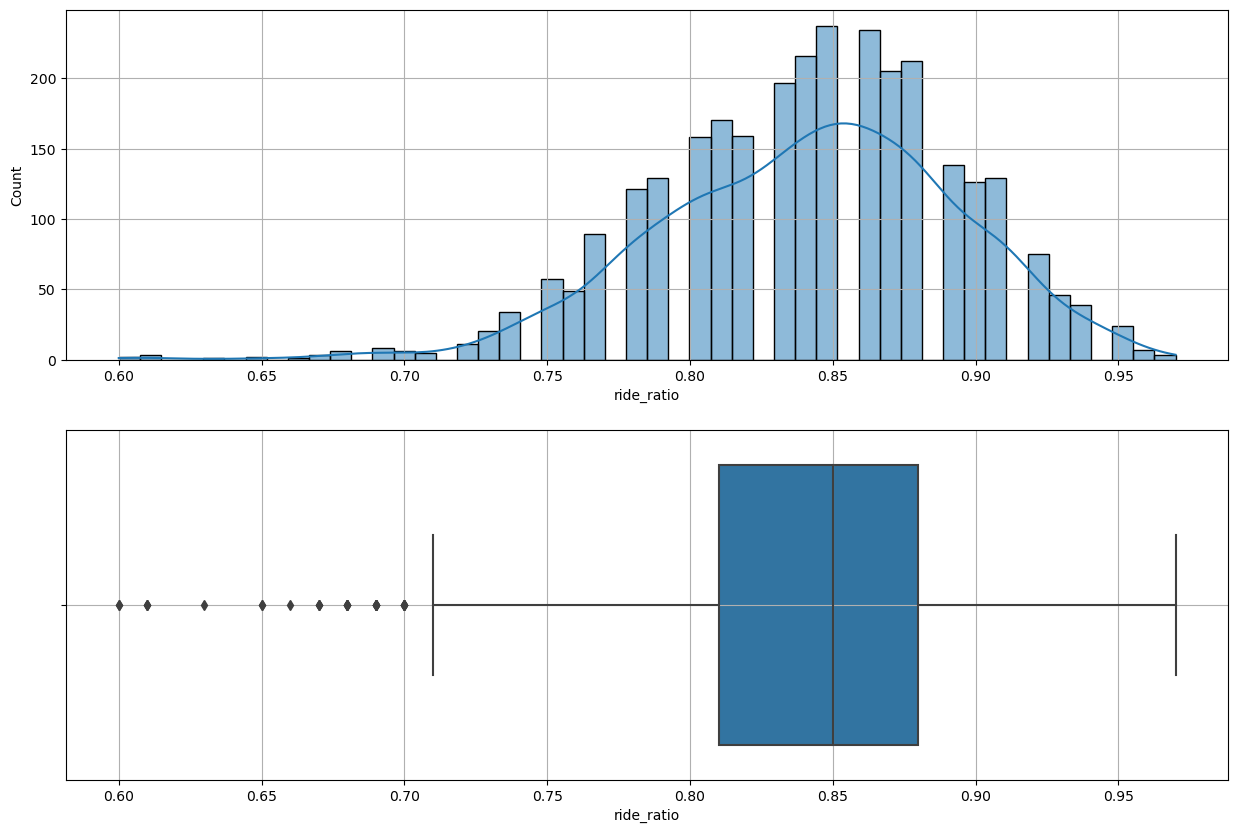

In [24]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

col = 'ride_ratio'

eda_1_n(data, col)

,count,mean,std,min,25%,50%,75%,max
ride_ratio,2922.0,0.84154,0.052311,0.6,0.81,0.85,0.88,0.97


None

,count,mean,std,min,25%,50%,75%,max
ride_ratio,2922.0,0.84154,0.052311,0.6,0.81,0.85,0.88,0.97


None

,count,mean,std,min,25%,50%,75%,max
ride_ratio,2922.0,0.84154,0.052311,0.6,0.81,0.85,0.88,0.97


None

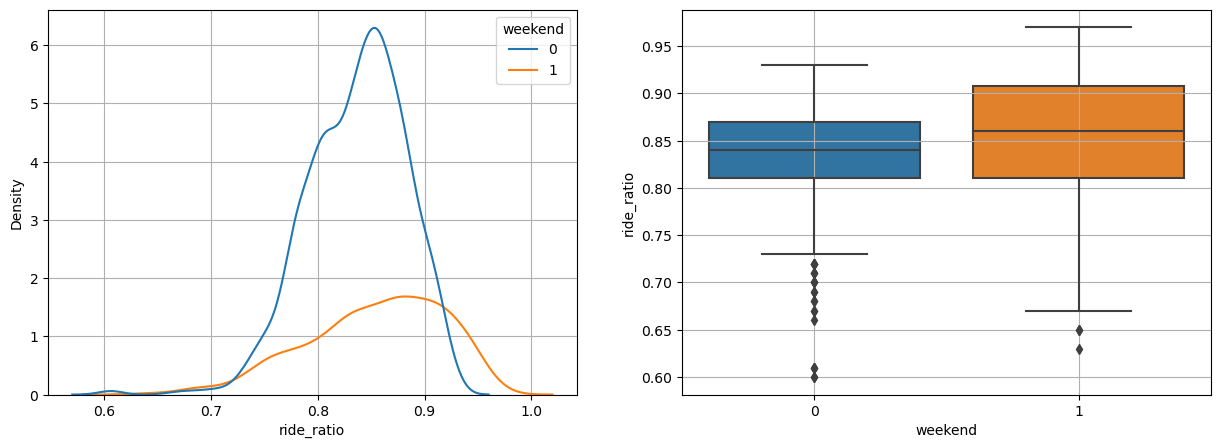

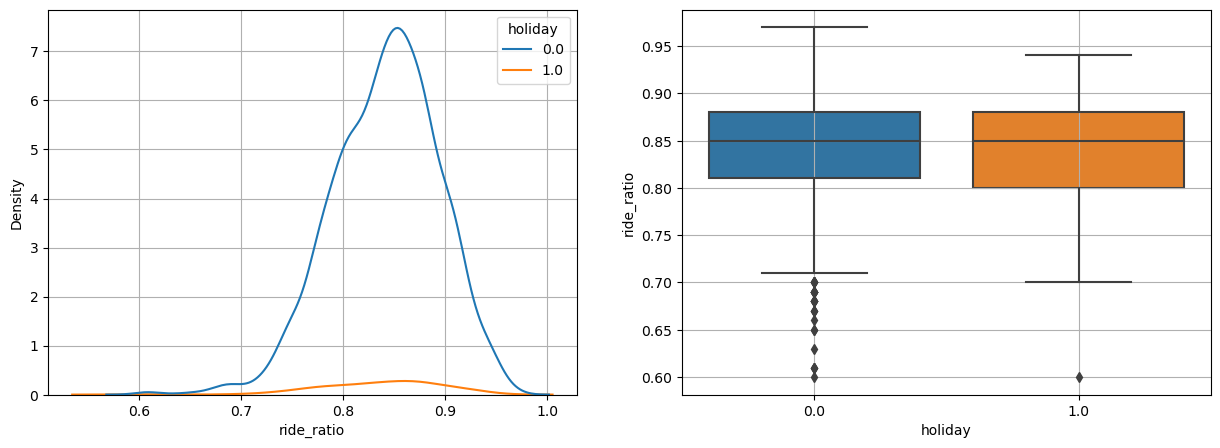

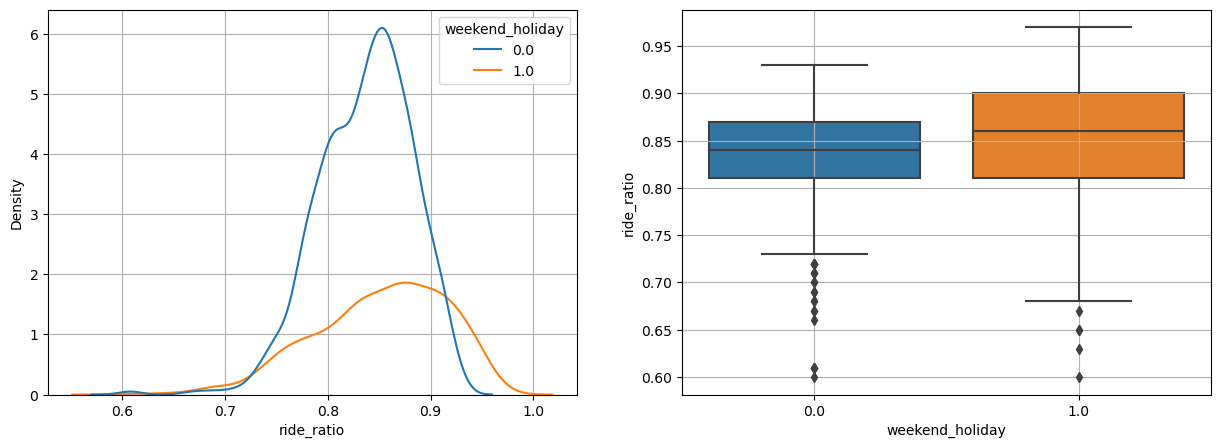

In [25]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n_weekend_holiday(data, col)

,count,mean,std,min,25%,50%,75%,max
ride_ratio,2922.0,0.84154,0.052311,0.6,0.81,0.85,0.88,0.97


None

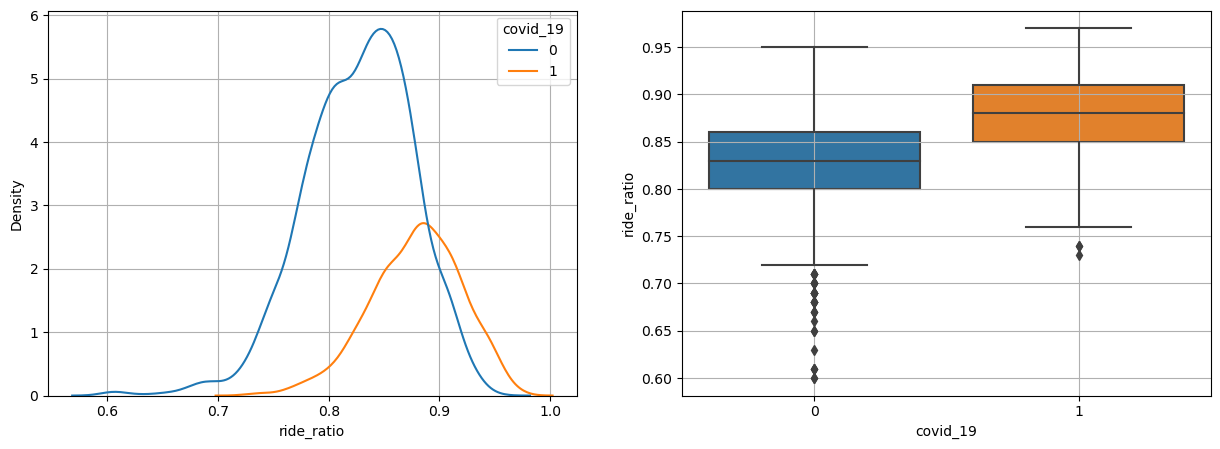

In [26]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 주말 일 경우
display(eda_1_n(data, col, hue_var = 'covid_19'))

#### 6) 최고기온(°C)

,count,mean,std,min,25%,50%,75%,max
temp_max,2922.0,18.0795,10.705421,-11.2,9.0,19.7,27.4,39.4


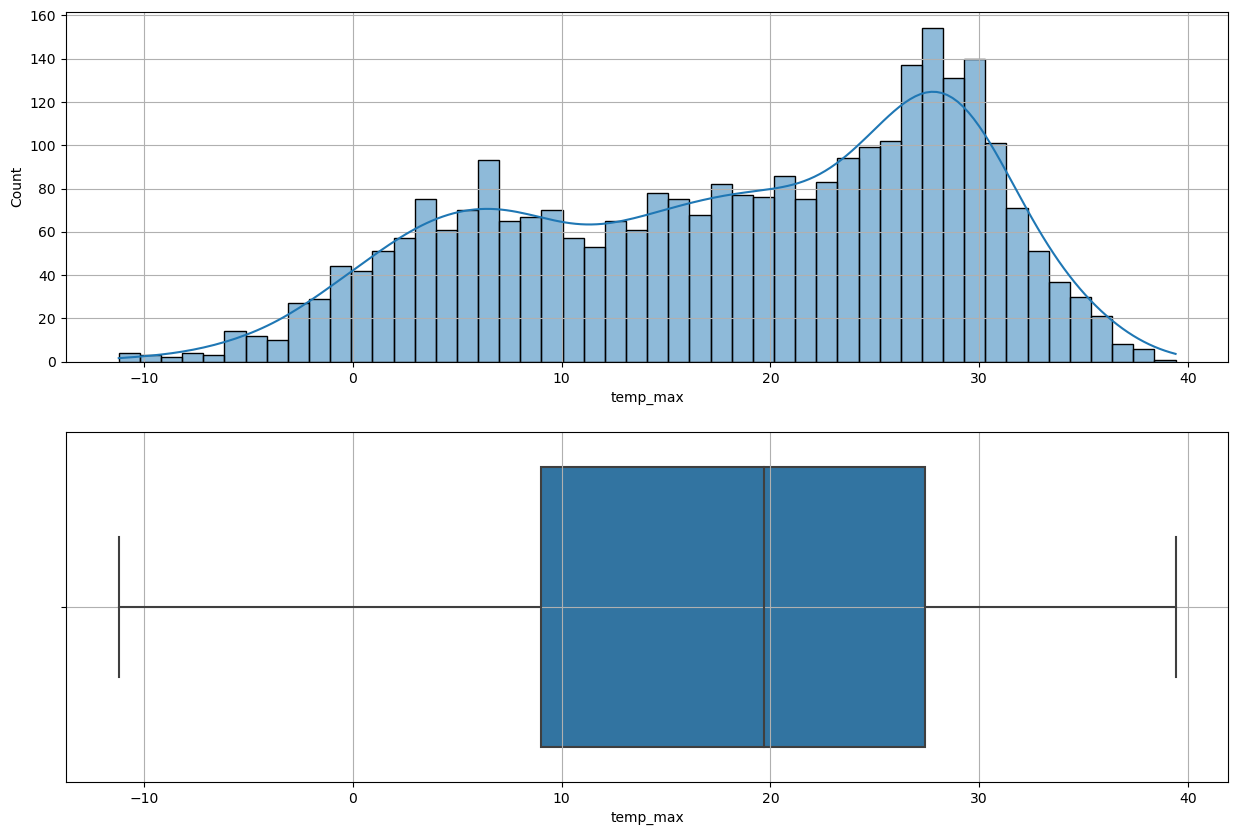

In [27]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

col = 'temp_max'

eda_1_n(data, col)

,count,mean,std,min,25%,50%,75%,max
temp_max,2922.0,18.0795,10.705421,-11.2,9.0,19.7,27.4,39.4


None

,count,mean,std,min,25%,50%,75%,max
temp_max,2922.0,18.0795,10.705421,-11.2,9.0,19.7,27.4,39.4


None

,count,mean,std,min,25%,50%,75%,max
temp_max,2922.0,18.0795,10.705421,-11.2,9.0,19.7,27.4,39.4


None

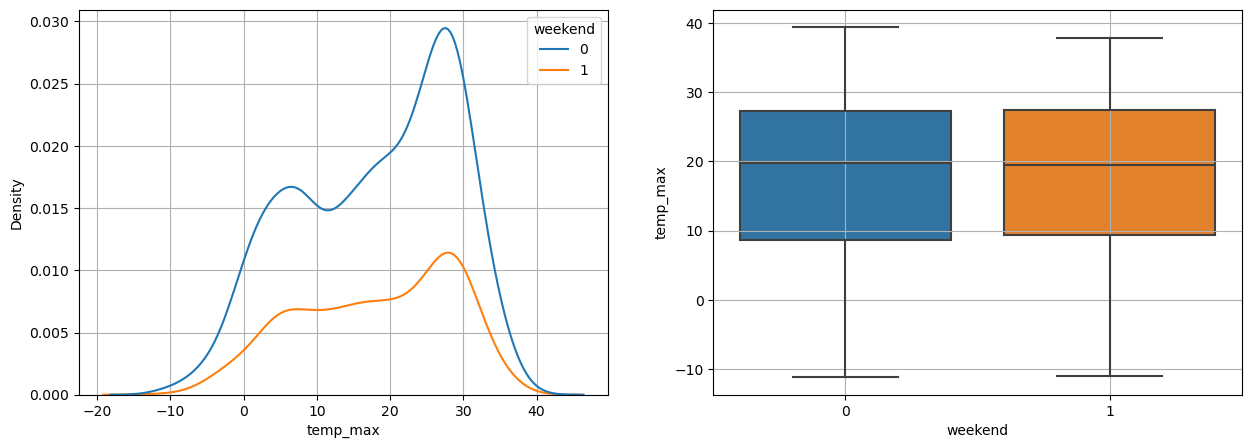

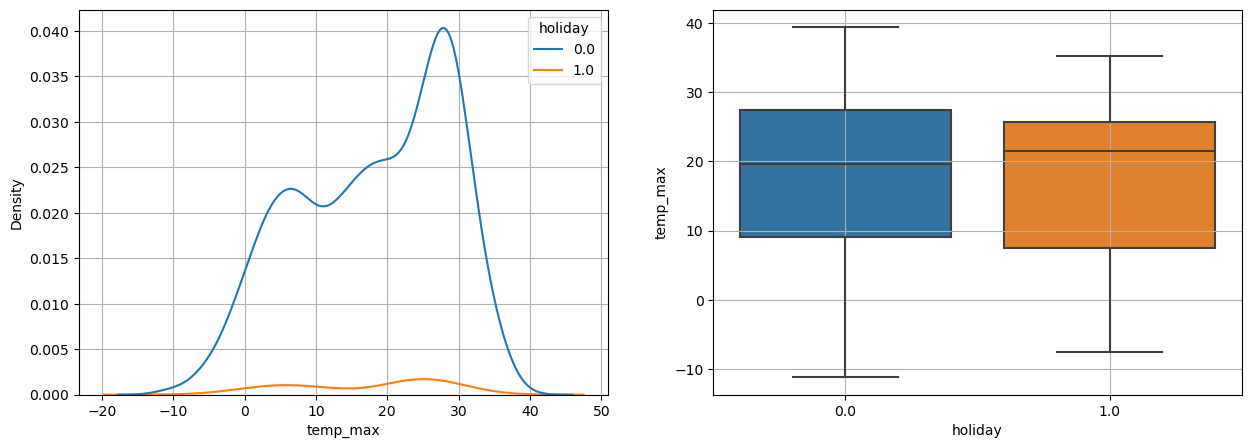

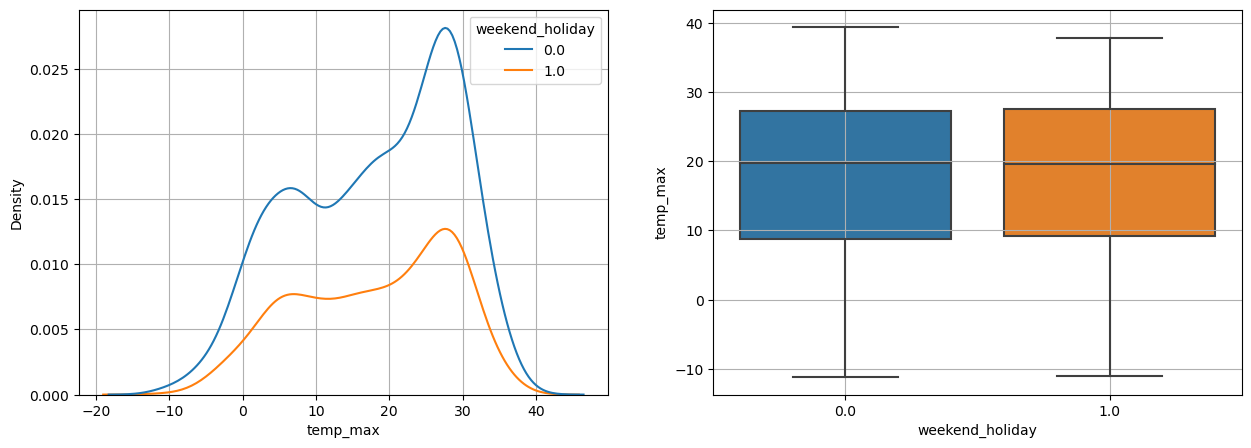

In [28]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n_weekend_holiday(data, col)

,count,mean,std,min,25%,50%,75%,max
temp_max,2922.0,18.0795,10.705421,-11.2,9.0,19.7,27.4,39.4


None

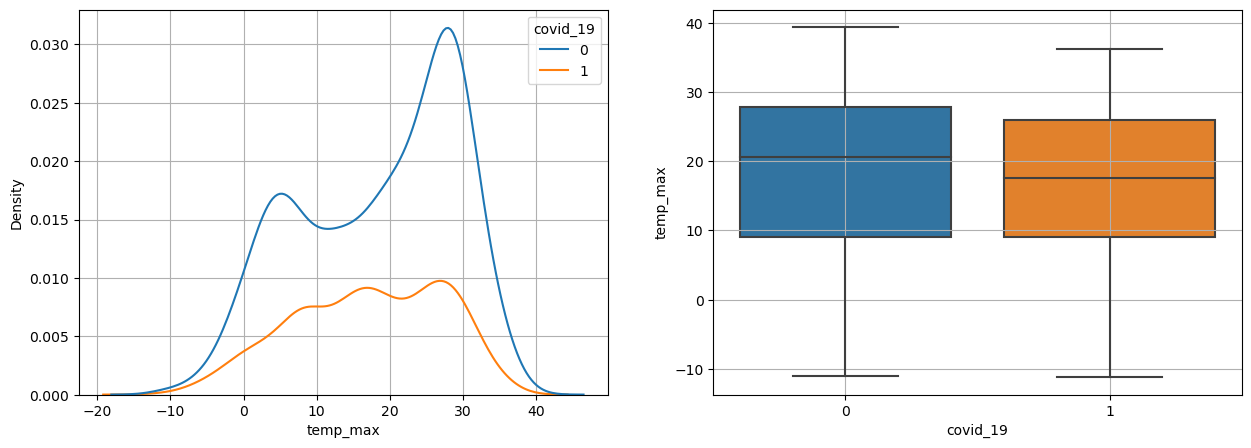

In [29]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 주말 일 경우
display(eda_1_n(data, col, hue_var = 'covid_19'))

#### 7) 일강수량(mm)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2922.0,3.355613,12.595804,0.0,0.0,0.0,0.3,178.9


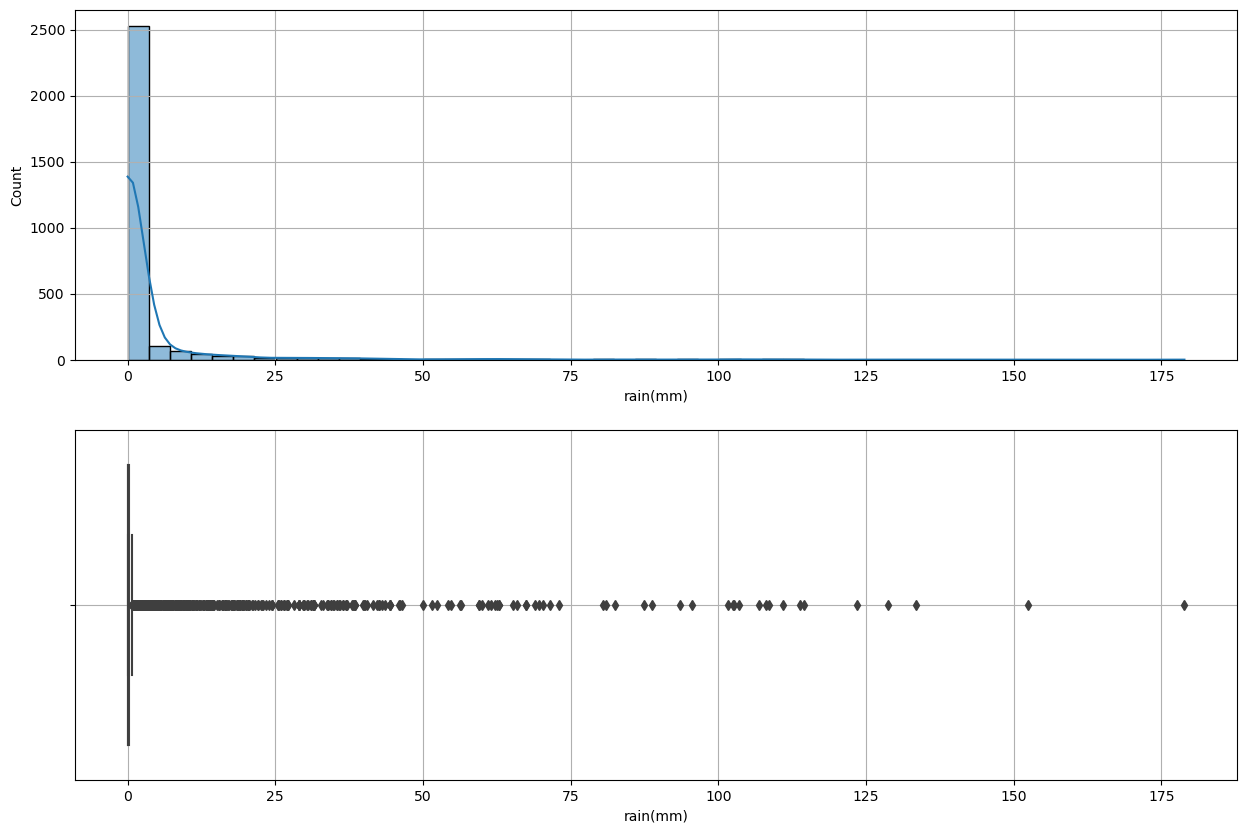

In [30]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

col = 'rain(mm)'

eda_1_n(data, col)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2922.0,3.355613,12.595804,0.0,0.0,0.0,0.3,178.9


None

,count,mean,std,min,25%,50%,75%,max
rain(mm),2922.0,3.355613,12.595804,0.0,0.0,0.0,0.3,178.9


None

,count,mean,std,min,25%,50%,75%,max
rain(mm),2922.0,3.355613,12.595804,0.0,0.0,0.0,0.3,178.9


None

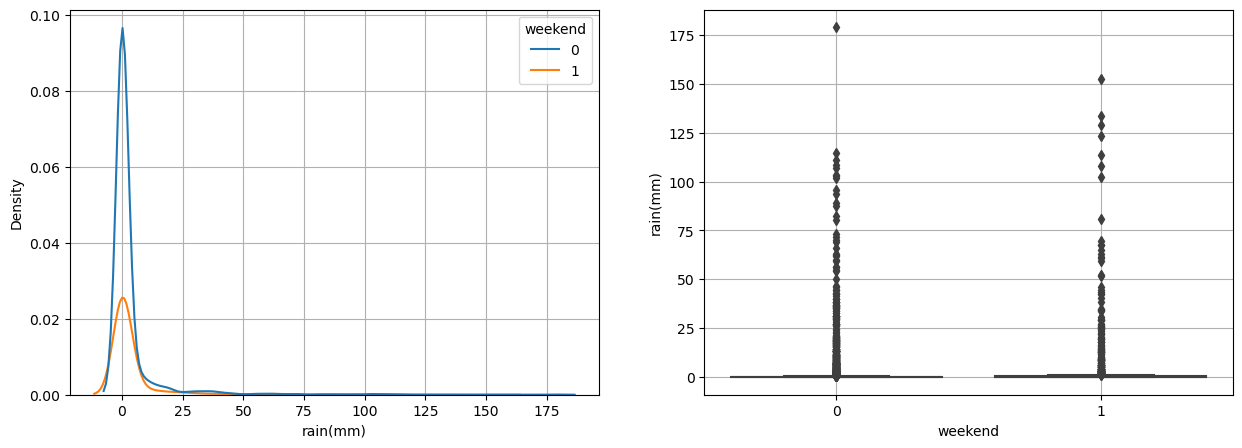

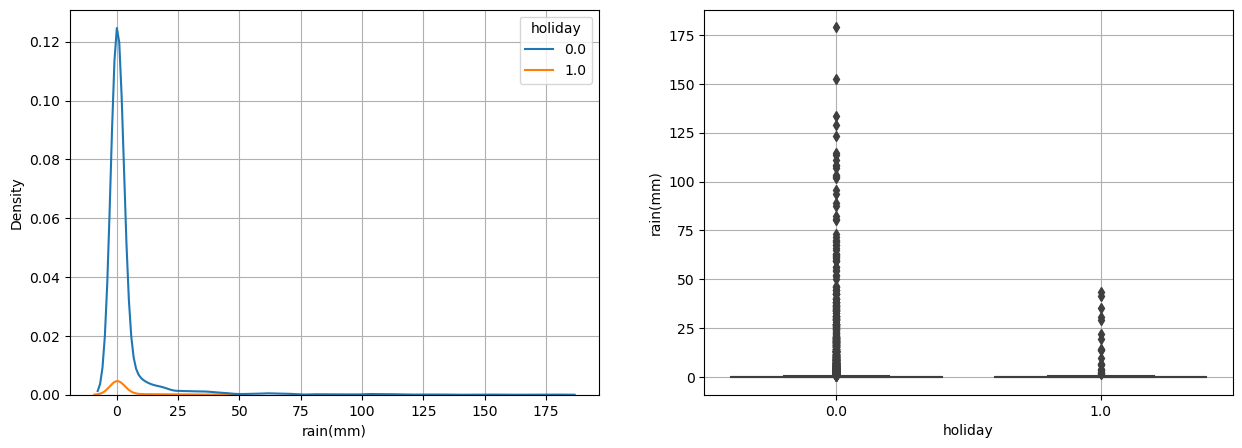

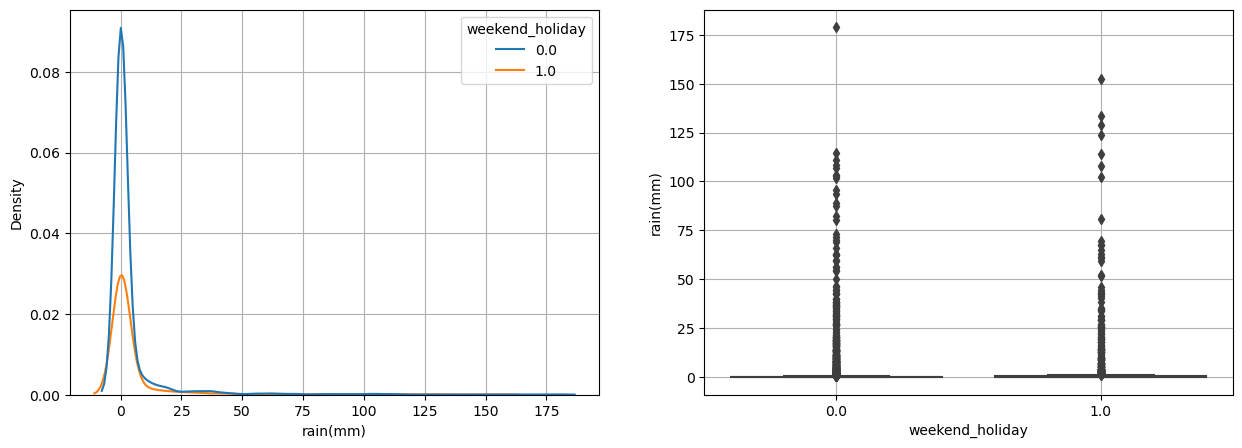

In [31]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n_weekend_holiday(data, col)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2922.0,3.355613,12.595804,0.0,0.0,0.0,0.3,178.9


None

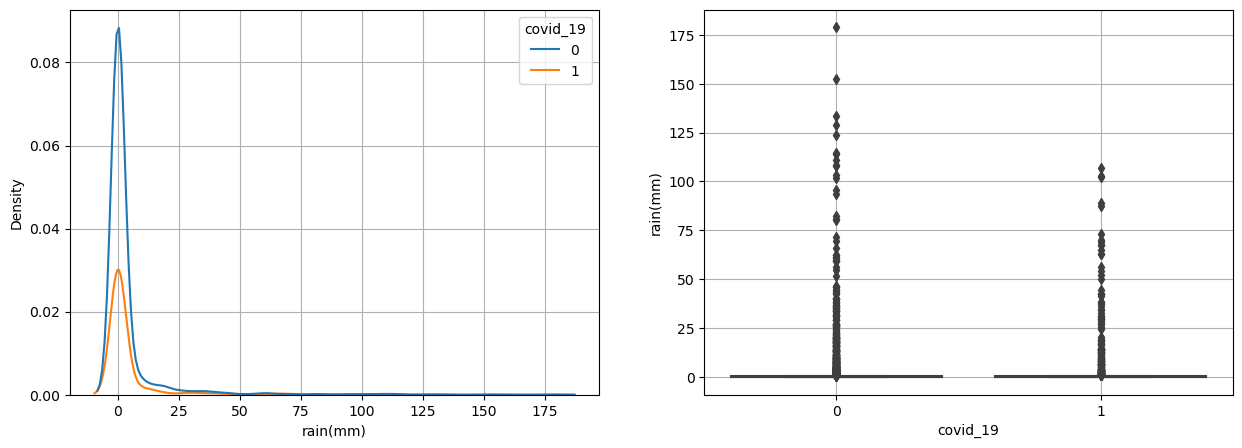

In [32]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 주말 일 경우
display(eda_1_n(data, col, hue_var = 'covid_19'))

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 공휴일 유무

,Count,Prop
0.0,2802,0.958932
1.0,120,0.041068


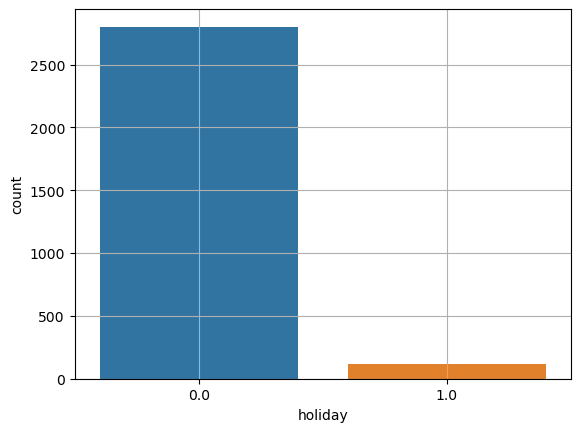

In [33]:
eda_1_c(data, var = 'holiday')

#### 2) 주말

,Count,Prop
0,2088,0.714579
1,834,0.285421


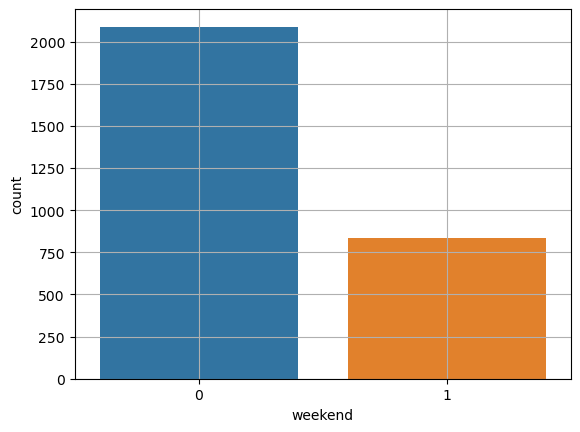

In [34]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_c(data, var = 'weekend')

#### 주말&공휴일

,Count,Prop
0.0,2005,0.686174
1.0,917,0.313826


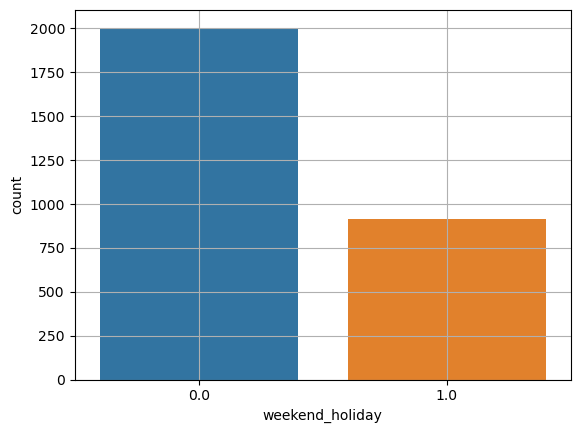

In [35]:
eda_1_c(data, var = 'weekend_holiday')

#### 코로나

,Count,Prop
0,2102,0.71937
1,820,0.28063


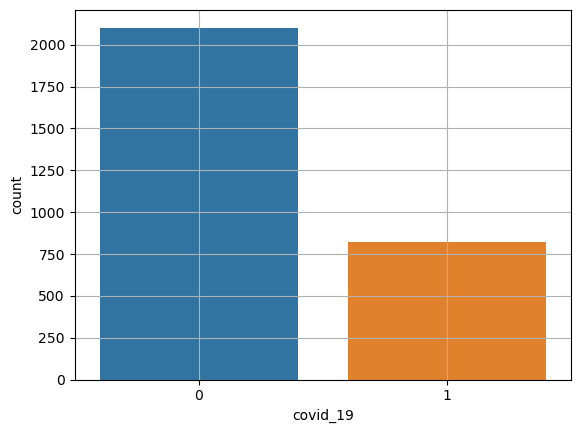

In [36]:
eda_1_c(data, var = 'covid_19')

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

In [37]:
data['weekend'] = data['weekend'].astype('category')
data['covid_19'] = data['covid_19'].astype('category')
data['holiday'] = data['holiday'].astype('category')
data['weekend_holiday'] = data['weekend_holiday'].astype('category')


##### 체감온도 컬럼 추가

In [38]:
data.head()

,Date,count_taxi,receipt,boarding,avg_rate,avg_ride_distance,target,temp_max,temp_min,rain(mm),...,season,year,weekend,covid_19,holiday,day7_avg_wait_time,ride_ratio,temp_avg,humidity_avg,weekend_holiday
0,2015-01-01,213,1023,924,2427,10764,17.2,-2.0,-8.9,0.0,...,Winter,2015,0,0,1.0,17.200000,0.90,-5.4,45.5,1.0
1,2015-01-02,420,3158,2839,2216,8611,26.2,2.4,-9.2,0.0,...,Winter,2015,0,0,0.0,21.700000,0.90,-3.4,55.0,0.0
2,2015-01-03,209,1648,1514,2377,10198,24.5,8.2,0.2,0.0,...,Winter,2015,1,0,0.0,22.633333,0.92,4.2,73.5,1.0
3,2015-01-04,196,1646,1526,2431,10955,26.2,7.9,-0.9,0.0,...,Winter,2015,1,0,0.0,23.525000,0.93,3.5,73.5,1.0
4,2015-01-05,421,4250,3730,2214,8663,23.6,4.1,-7.4,3.4,...,Winter,2015,0,0,0.0,23.540000,0.88,-1.7,63.5,0.0


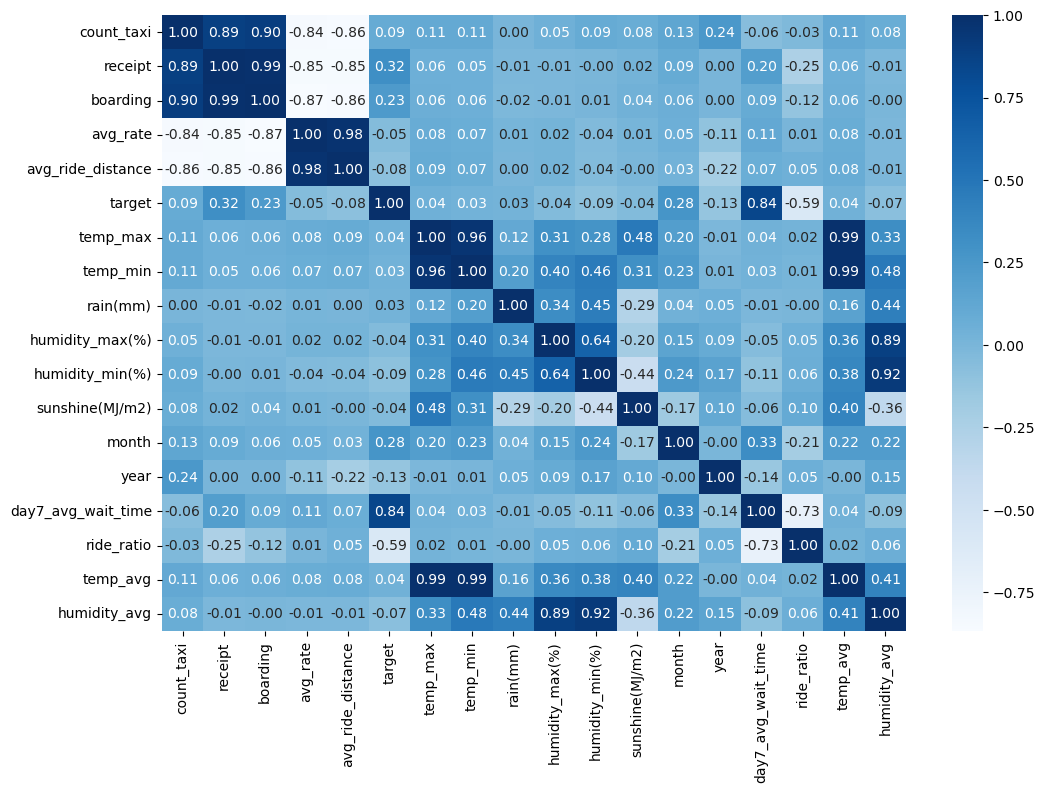

In [39]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

plt.figure(figsize = (12, 8))

sns.heatmap(data = data.corr(numeric_only = True),
            annot = True,
            fmt = '.2f',
            cmap = 'Blues')
plt.show()

#### 1) 전체 상관계수 시각화

In [40]:
# 전체 상관관계를 한눈에 보여주기 함수
def eda_2_corr(data, num_vars):

    temp = data.loc[:, num_vars]
    corr = temp.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    display(mask * corr)

    sns.set(style='white')
    plt.figure(figsize=(12, 12))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot = True)
    plt.show()

In [41]:
data.columns

Index(['Date', 'count_taxi', 'receipt', 'boarding', 'avg_rate',
       'avg_ride_distance', 'target', 'temp_max', 'temp_min', 'rain(mm)',
       'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)', 'weekday',
       'month', 'season', 'year', 'weekend', 'covid_19', 'holiday',
       'day7_avg_wait_time', 'ride_ratio', 'temp_avg', 'humidity_avg',
       'weekend_holiday'],
      dtype='object')

,count_taxi,receipt,boarding,avg_rate,avg_ride_distance,ride_ratio,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),temp_avg,humidity_avg,month,year,target
count_taxi,1.0,0.885891,0.904666,-0.844747,-0.857720,-0.027245,0.108444,0.109567,0.002630,0.049112,0.088131,0.076509,0.110110,0.077438,0.131941,0.243698,0.088040
receipt,0.0,1.000000,0.988755,-0.850509,-0.847931,-0.250082,0.057957,0.054169,-0.012803,-0.013810,-0.000597,0.024437,0.056619,-0.007383,0.089444,0.001568,0.316562
boarding,0.0,0.000000,1.000000,-0.868124,-0.858811,-0.116599,0.064283,0.058452,-0.015746,-0.008045,0.006238,0.040464,0.061984,-0.000382,0.060421,0.001700,0.229574
avg_rate,-0.0,-0.000000,-0.000000,1.000000,0.977615,0.007111,0.083955,0.070507,0.011267,0.019822,-0.035445,0.008843,0.077912,-0.011006,0.051396,-0.108421,-0.049645
avg_ride_distance,-0.0,-0.000000,-0.000000,0.000000,1.000000,0.046916,0.088111,0.073573,0.004747,0.020547,-0.040055,-0.000657,0.081582,-0.013380,0.033894,-0.217514,-0.084684
ride_ratio,-0.0,-0.000000,-0.000000,0.000000,0.000000,1.000000,0.023046,0.012661,-0.003844,0.053111,0.059024,0.101094,0.018101,0.062152,-0.205401,0.054649,-0.588492
temp_max,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.961573,0.116839,0.306414,0.284582,0.475197,0.990269,0.325282,0.200772,-0.012206,0.044325
temp_min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.201817,0.401052,0.462011,0.308483,0.990414,0.479028,0.231321,0.006385,0.033592
rain(mm),0.0,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.335441,0.446553,-0.285402,0.161071,0.436440,0.043834,0.051944,0.028469
humidity_max(%),0.0,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.638800,-0.203655,0.357428,0.889034,0.152004,0.091800,-0.036370


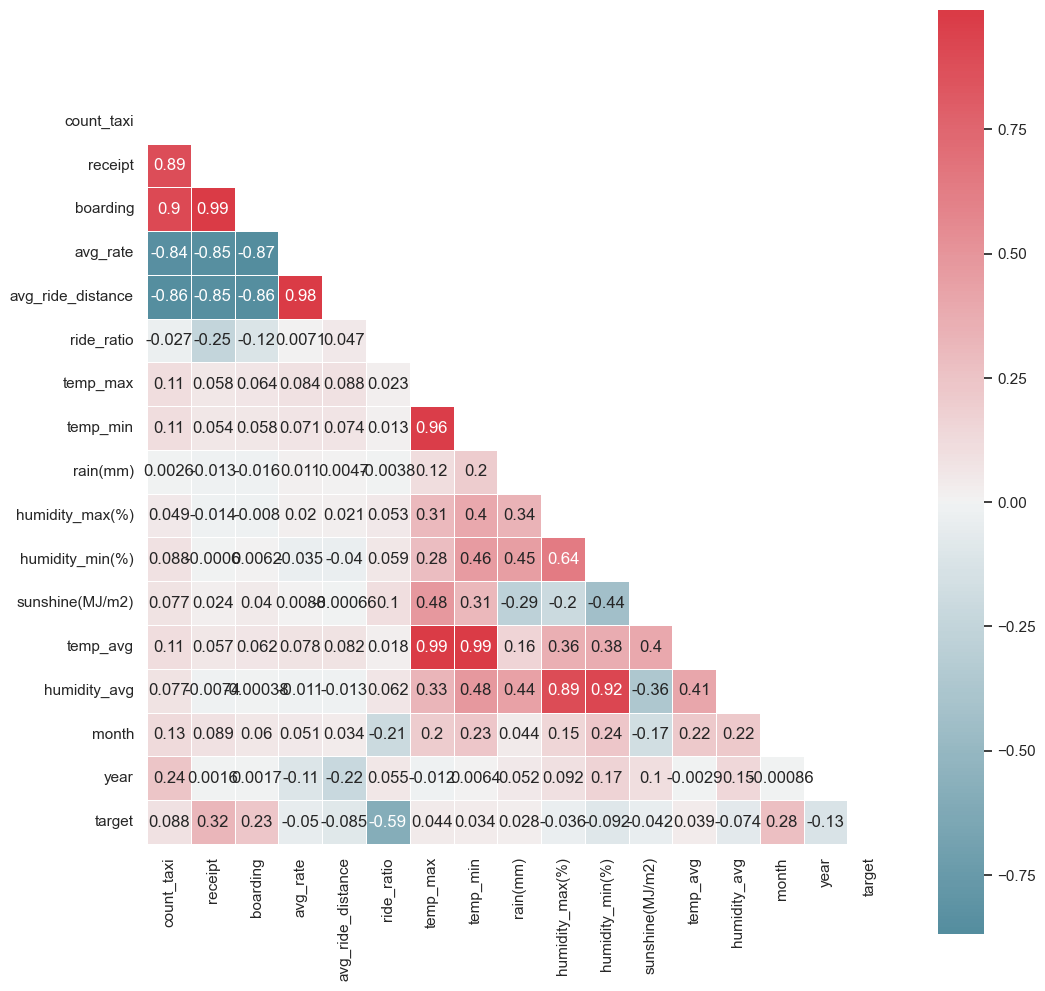

In [42]:
num_vars = ['count_taxi', 'receipt', 'boarding', 'avg_rate', 'avg_ride_distance', 'ride_ratio',
            'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)',
            'temp_avg', 'humidity_avg', 'month', 'year', 'target']

eda_2_corr(data, num_vars)

#### 2) 산점도

In [43]:
def eda_2_nn(data, target, var, hue = ''):

    plt.figure(figsize = (8,8))
    if hue == '' :
        sns.scatterplot(x = var, y = target, data = data)
        plt.grid()

    if hue != '' :
        sns.scatterplot(x = var, y = target, data = data, hue = hue)
        plt.grid()

    plt.show()

* ride_rate == rid_ratio

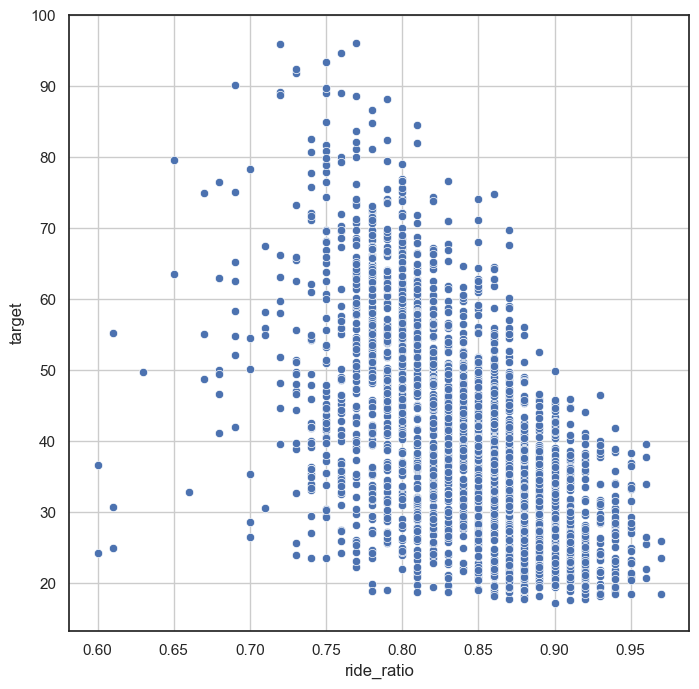

In [44]:
eda_2_nn(data, 'target', 'ride_ratio')

* fare == avg_rate

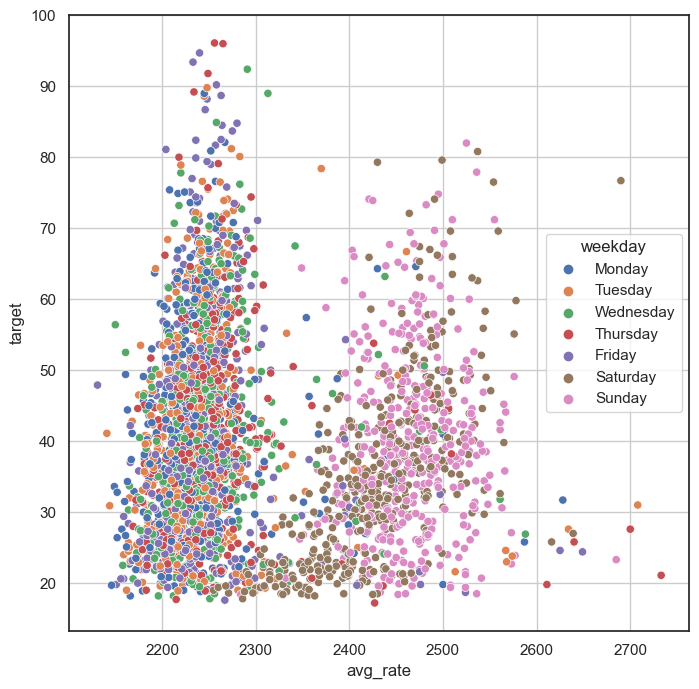

In [45]:
eda_2_nn(data, 'target', 'avg_rate', 'weekday')

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

* 휴일 여부

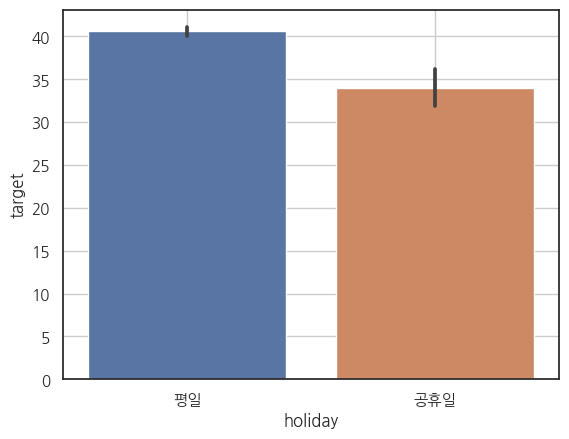

In [61]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sns.barplot(x = 'holiday', y = 'target', data = data)
plt.xticks(ticks=[0, 1], labels=['평일', '공휴일'])

plt.grid()
plt.show()

In [47]:
# t-test
h0 = data.loc[data['holiday']==0, 'target']
h1 = data.loc[data['holiday']==1, 'target']
spst.ttest_ind(h0, h1)

Ttest_indResult(statistic=5.078160958101015, pvalue=4.0505005123594406e-07)

* 주말

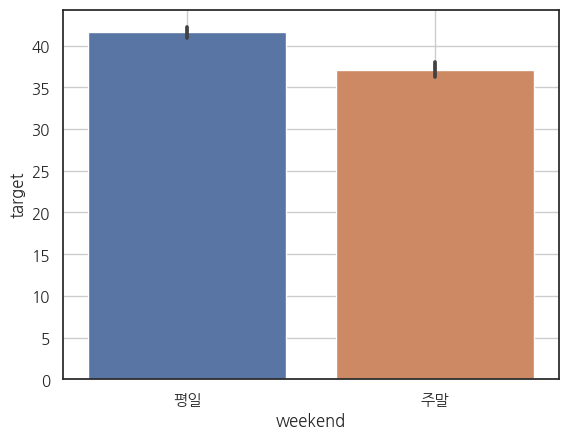

In [62]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sns.barplot(x = 'weekend', y = 'target', data = data)
plt.xticks(ticks=[0, 1], labels=['평일', '주말'])

plt.grid()
plt.show()

In [49]:
# t-test
h0 = data.loc[data['weekend']==0, 'target']
h1 = data.loc[data['weekend']==1, 'target']
spst.ttest_ind(h0, h1)

Ttest_indResult(statistic=7.917032903397524, pvalue=3.42488756704735e-15)

* 주말 & 공휴일

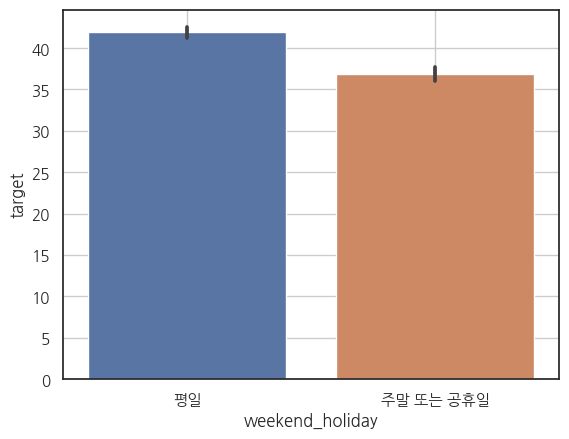

In [63]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sns.barplot(x = 'weekend_holiday', y = 'target', data = data)
plt.xticks(ticks=[0, 1], labels=['평일', '주말 또는 공휴일'])

plt.grid()
plt.show()

In [51]:
# t-test
h0 = data.loc[data['weekend_holiday']==0, 'target']
h1 = data.loc[data['weekend_holiday']==1, 'target']
spst.ttest_ind(h0, h1)

Ttest_indResult(statistic=9.097885902310416, pvalue=1.6609595250008957e-19)

* 코로나

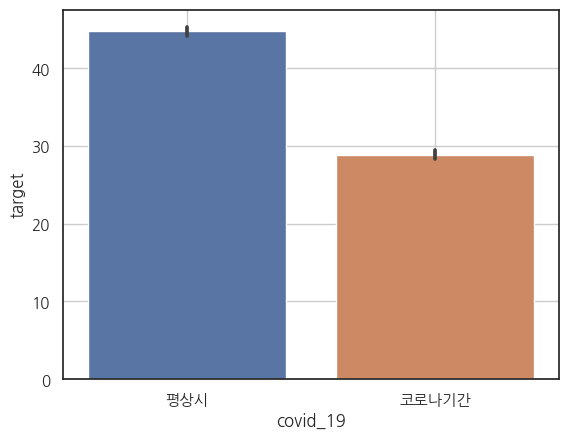

In [64]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sns.barplot(x = 'covid_19', y = 'target', data = data)
plt.xticks(ticks=[0, 1], labels=['평상시', '코로나기간'])

plt.grid()
plt.show()

In [53]:
# t-test
h0 = data.loc[data['covid_19']==0, 'target']
h1 = data.loc[data['covid_19']==1, 'target']
spst.ttest_ind(h0, h1)

Ttest_indResult(statistic=31.718933261457867, pvalue=5.512162412795066e-190)

* 요일

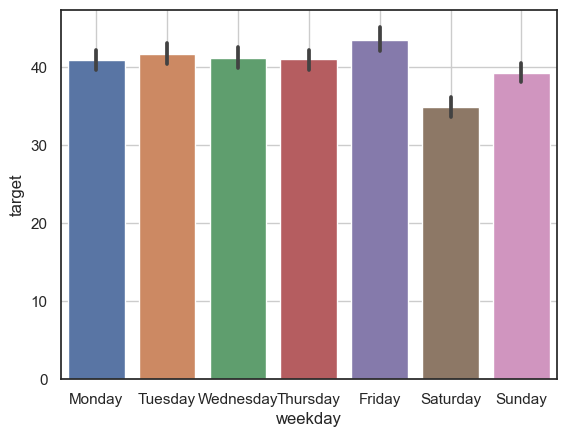

In [54]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sns.barplot(x = 'weekday', y = 'target', data = data)

plt.grid()
plt.show()

In [55]:
# anova
temp = data.loc[data['weekday'].notnull()]

w0 = temp.loc[temp['weekday']=='Monday', 'target']
w1 = temp.loc[temp['weekday']=='Tuesday', 'target']
w2 = temp.loc[temp['weekday']=='Wednesday', 'target']
w3 = temp.loc[temp['weekday']=='Thursday', 'target']
w4 = temp.loc[temp['weekday']=='Friday', 'target']
w5 = temp.loc[temp['weekday']=='Saturday', 'target']
w6 = temp.loc[temp['weekday']=='Sunday', 'target']

spst.f_oneway(w0,w1,w2,w3,w4,w5,w6)

F_onewayResult(statistic=15.668738200566109, pvalue=8.766163819661817e-18)

* 계절

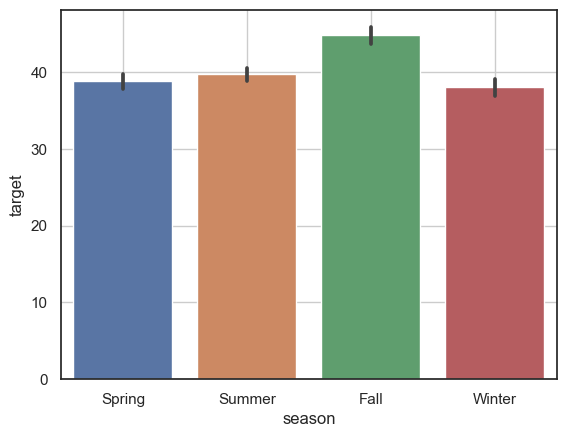

In [56]:
sns.barplot(x = 'season', y = 'target', data = data)
plt.grid()
plt.show()

In [57]:
# anova
temp = data.loc[data['season'].notnull()]

s0 = temp.loc[temp['season']=='Spring', 'target']
s1 = temp.loc[temp['season']=='Summer', 'target']
s2 = temp.loc[temp['season']=='Fall', 'target']
s3 = temp.loc[temp['season']=='Winter', 'target']

spst.f_oneway(s0,s1,s2,s3)

F_onewayResult(statistic=34.73562423868687, pvalue=4.719868115759872e-22)

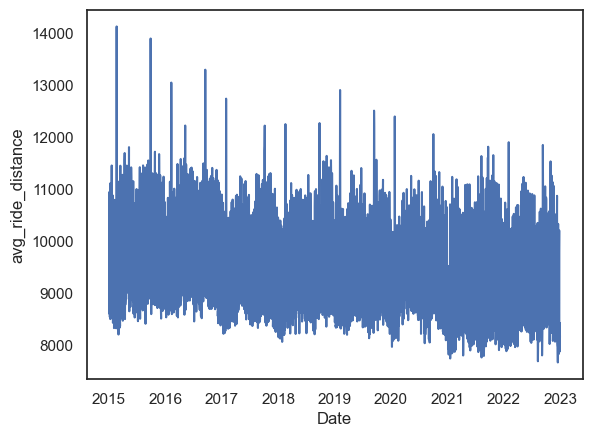

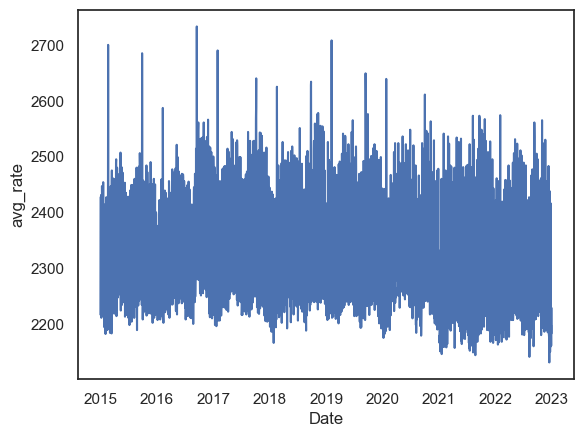

In [58]:
sns.lineplot(data = data, x = 'Date', y = 'avg_ride_distance')
plt.show()

sns.lineplot(data = data, x = 'Date', y = 'avg_rate')
plt.show()

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

#### 강한 관계의 변수

- 'count_taxi': 운행 된 차량 수 , 'receipt': 접수 건수, 'boarding': 이용 건수, 'avg_rate': 평균요금, 'avg_ride_distance': 평균 거리, 'ride_ratio': 
- 'covid_19': 코로나 발생 시점 ~ 집합 금지, 집합 금지 ~ 사회적 거리두기, 그 이후로 3분류
- 'holiday', 'day7_avg_wait_time', 'ride_ratio', 
- 'weekend_holiday', 'weekday_Saturday', 'weekday_Sunday', 'rainyday'

#### 중간(약한) 관계의 변수

- 'temp_max', 'temp_min' -> 'temp_avg'로 치환
- 'humidity_max(%)', 'humidity_min(%)' -> 'humidity_avg'로 치환
- 'month'
- 'weekend', 'weekday_Monday', 'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday', 'weekday_Friday' -> 평일의 요일 간 차이는 없다고 보고 평일/토요일/일요일로 나눔  

#### (거의) 관계가 없는 변수

- 'season_Spring', 'season_Summer', 'season_Fall', 'season_Winter' -> 날씨 정보와 상관없이 '달'로 구분했기 때문에 관계가 적다고 생각
- 'sunshine(MJ/m2)'

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [59]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

joblib.dump(data, 'data2.pkl')

['data2.pkl']